## Caso Practico Final Aprendizaje Automatico

### Alumna: Zenia Luz Canto Meza
### Master en Data Science

### Importamos las librerías con las que trabajaremos:

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import xgboost as xgb

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder, MinMaxScaler, LabelEncoder
from scipy.stats import boxcox, probplot, norm
from sklearn.feature_selection import VarianceThreshold
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,accuracy_score,recall_score
from imblearn.combine import SMOTETomek
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")



#### Importamos la data:

In [120]:
df = pd.read_csv('online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


Revisando el contenido general del DataFrame, para saber que tipo de datos tengo y la cantidad de valores no nulos.

## Análisis Exploratorio de Datos

Analizando la estructura y tipos de datos del dataFrame.

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Se observa que hay algunas columnas que tienen menor cantidad de registros no nulos, los cuales deberan ser tratados y limpiados.

### Tratamiento de los valores Faltantes:

Obtenemos los valores nulos de dataFrame:

In [122]:
df.isna().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Se han identificado 8 columnas que tienen valores nulos que tendrán que ser limpiados.

In [123]:
df[df.isna().sum(axis=1).astype(bool)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,2,1,Returning_Visitor,False,False
1132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,1,2,Returning_Visitor,False,False
1133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,4,5,1,Returning_Visitor,False,False
1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,False,False
1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,True,False
1474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,6,1,Returning_Visitor,True,False
1475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,3,1,Returning_Visitor,False,False
1476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,2,3,Returning_Visitor,False,False


#### Eliminando lo valores nulos del dataFrame:

In [124]:
df_limpio = df.dropna(axis=0).reset_index(drop=True)

In [125]:
print("Total de valores nulos:", df_limpio.isna().sum().sum())

Total de valores nulos: 0


#### Quitando punto decimal a variables enteras:

In [126]:
df_limpio['Administrative'] = df_limpio['Administrative'].astype(int)
df_limpio['Informational'] = df_limpio['Informational'].astype(int)
df_limpio['ProductRelated'] = df_limpio['ProductRelated'].astype(int)

### Análisis de Variables del dataFrame:

In [127]:
df_limpio.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.895952,0.061497,2.124147,2.357584,3.148019,4.070477
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.577926,0.199020,0.911566,1.718028,2.402211,4.024598
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


#### Verificación del sesgo de las variables contínuas:

In [128]:
columnas_continuas = df_limpio.select_dtypes(include=['float64', 'int64','int']).columns

df_limpio[columnas_continuas].skew()


Administrative             1.958876
Administrative_Duration    5.612961
Informational              4.034822
Informational_Duration     7.574782
ProductRelated             4.340222
ProductRelated_Duration    7.261692
BounceRates                2.952466
ExitRates                  2.152753
PageValues                 6.379390
SpecialDay                 3.300309
OperatingSystems           2.066772
Browser                    3.240985
Region                     0.983269
TrafficType                1.963175
dtype: float64

Se puede observar que todas las variables estan fuertemente sesgadas a la derecha, lo cual nos indica que no tienen distribuciones normales simétricas, en especial las variables de duración y PageValues. 

### Análisis de la Variable dependiente "Revenue"

Text(1, 1908, '15.49%')

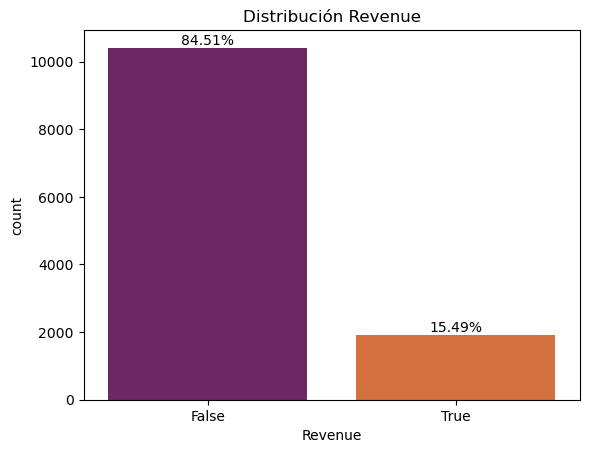

In [129]:
counts = df_limpio['Revenue'].value_counts()
Revenue_false = (counts[0] / len(df_limpio['Revenue'])) * 100
Revenue_true = (counts[1] / len(df_limpio['Revenue'])) * 100

ax = sns.countplot(x='Revenue', data=df_limpio, palette='inferno')
plt.title('Distribución Revenue')

ax.text(0, counts[0], f'{Revenue_false:.2f}%', ha="center", va="bottom")
ax.text(1, counts[1], f'{Revenue_true:.2f}%', ha="center", va="bottom")

Como podemos observar, solo el **15.49% de las visitas registradas en el data set se concretaron en un ingreso (Revenue)**, este desbalanceo de clases tendrá que ser tomado en cuenta al momento de elegir modelos de entrenamiento.

#### Análisis de Variables: Administrative y Administrative_Duration

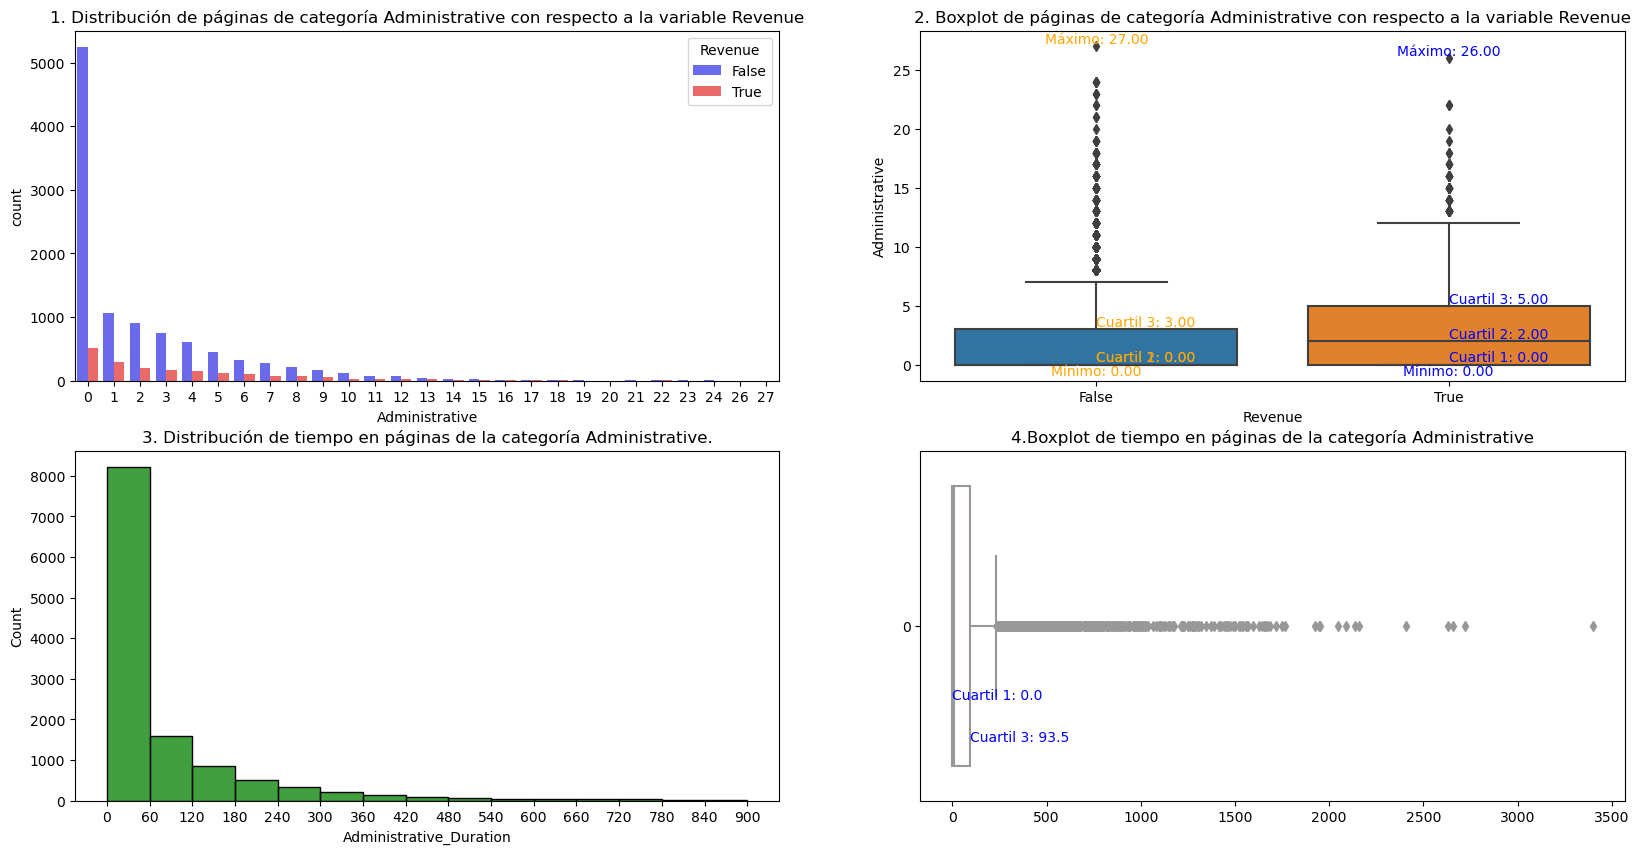

In [130]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.title('1. Distribución de páginas de categoría Administrative con respecto a la variable Revenue')
sns.countplot(x= 'Administrative', hue = 'Revenue', data = df_limpio, palette='seismic')

plt.subplot(2, 2, 2)

sns.boxplot(x='Revenue', y='Administrative', data=df_limpio)

for cat, color in zip([True, False], ['blue', 'orange']):
    subset_data = df_limpio[df_limpio['Revenue'] == cat]['Administrative']
    min_val = subset_data.min()
    max_val = subset_data.max()
    quartiles = subset_data.quantile([0.25, 0.5, 0.75])

    plt.text(cat, max_val, f'Máximo: {max_val:.2f}', color=color, verticalalignment='bottom', horizontalalignment='center')
    plt.text(cat, min_val, f'Mínimo: {min_val:.2f}', color=color, verticalalignment='top', horizontalalignment='center')

    for i, q in enumerate(quartiles):
        plt.text(cat, q, f'Cuartil {i+1}: {q:.2f}', color=color, verticalalignment='bottom', horizontalalignment='left')


plt.title('2. Boxplot de páginas de categoría Administrative con respecto a la variable Revenue')

plt.subplot(2, 2, 3)
rangos=[0,60,120,180,240,300,360,420,480,540,600,660,720,780,840,900]
sns.histplot(df_limpio['Administrative_Duration'], bins = rangos,color='green')
plt.title('3. Distribución de tiempo en páginas de la categoría Administrative.')
plt.xticks(rangos)

plt.subplot(2, 2, 4)

ax=sns.boxplot(data=df_limpio['Administrative_Duration'], palette='seismic', orient='h')

maximo = df_limpio['Administrative_Duration'].max()
minimo = df_limpio['Administrative_Duration'].min()
q1 = df_limpio['Administrative_Duration'].quantile(0.25)
q3 = df_limpio['Administrative_Duration'].quantile(0.75)

ax.text(q1, 0.2, f'Cuartil 1: {q1}', verticalalignment='center', horizontalalignment='left', color='blue')
ax.text(q3, 0.3, f'Cuartil 3: {q3}', verticalalignment='top', horizontalalignment='left', color='blue')

plt.title('4.Boxplot de tiempo en páginas de la categoría Administrative')

plt.show()

- Según la figura 1 de distribución, la categoría Administrative no es relevante para generar ventas.

- En la figura 2 de boxplot, se puede observar claramente que la información de las vistas a las páginas de la categoría administrative estan sesgados altamente a la derecha, en especial el conteo de páginas visitadas de esta categoría que no concretaron un ingreso(Revenue) tienden a cero visitas a páginas de esta categoría hasta un máximo de 7 visitas. Observando el boxplot de las visitas que si concretaron un ingreso(Revenue), tambien estan sesgados a la derecha pero en menor proporción comparado con los que no concretaron ingresos ya que la media de paginas visitadas es mayor a la media de los que no concretaron ingresos, ambos tienen muchos valores atipicos (outliers) que tendremos que normalizar antes de implementar un modelo con los datos de esta variable.

- En la figura 3 respecto a la duración, se puede observar que la gran mayoría dura menos de un minuto en las páginas de esta categoría.

- En la figura 4 del boxplot de duración se observa que los datos estan fuertemente sesgados a la derecha con los datos acumulados por debajo de 233 seg. y se puede ver que también tienen muchos valores atípicos los cuales tendrán que ser normalizados.

#### Análisis de Variables: 	Informational e Informational_Duration

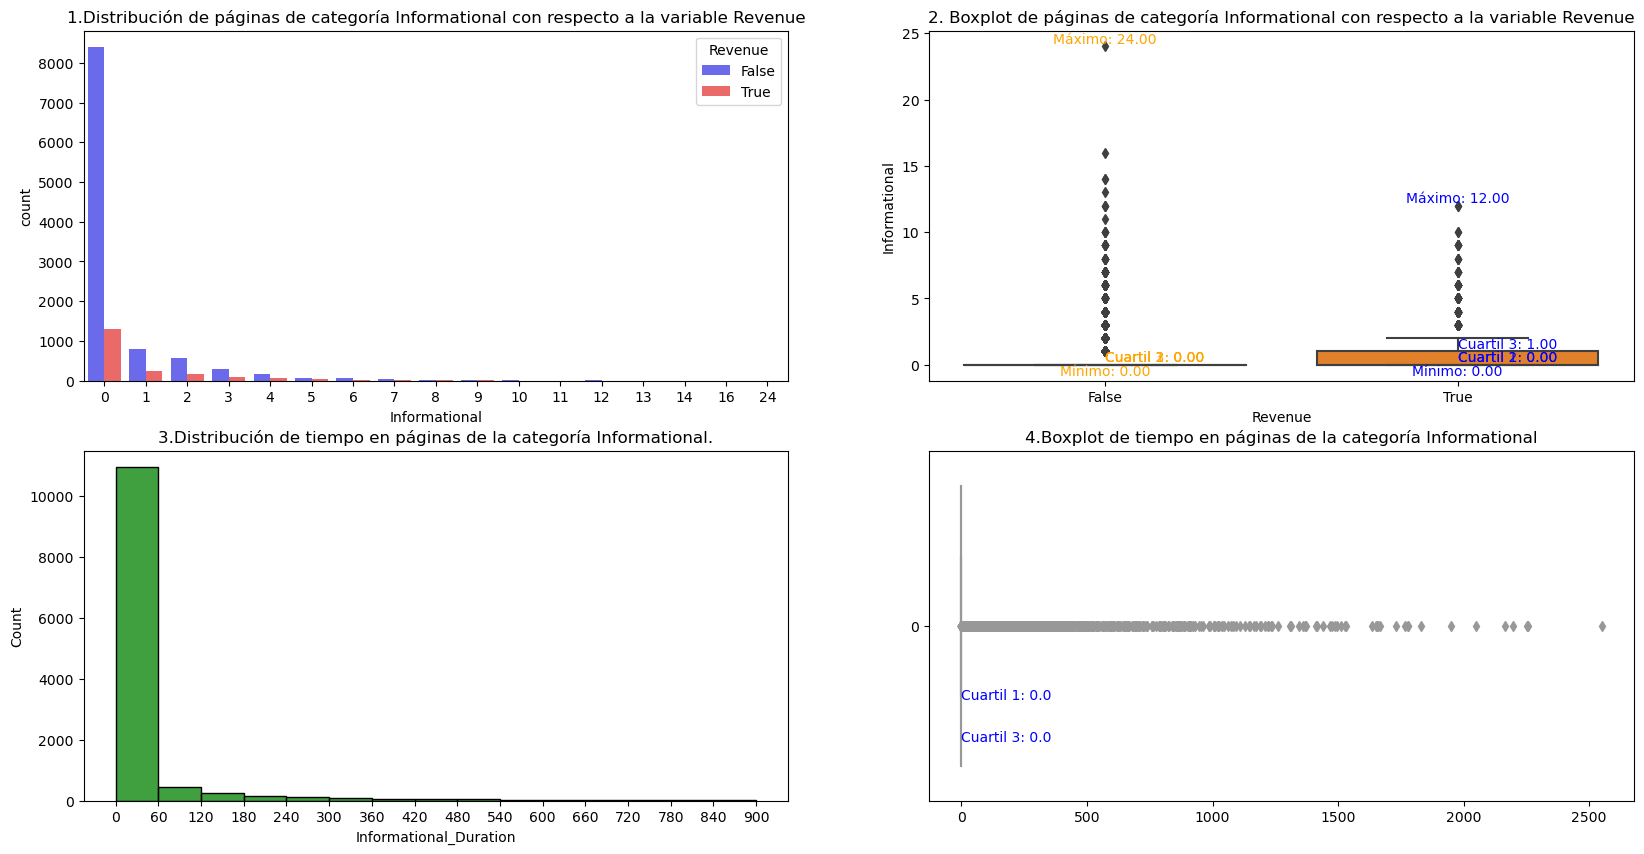

In [131]:
plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
plt.title('1.Distribución de páginas de categoría Informational con respecto a la variable Revenue')
sns.countplot(x= 'Informational', hue = 'Revenue', data = df_limpio, palette='seismic')

plt.subplot(2, 2, 2)

sns.boxplot(x='Revenue', y='Informational', data=df_limpio)

for cat, color in zip([True, False], ['blue', 'orange']):
    subset_data = df_limpio[df_limpio['Revenue'] == cat]['Informational']
    min_val = subset_data.min()
    max_val = subset_data.max()
    quartiles = subset_data.quantile([0.25, 0.5, 0.75])

    plt.text(cat, max_val, f'Máximo: {max_val:.2f}', color=color, verticalalignment='bottom', horizontalalignment='center')
    plt.text(cat, min_val, f'Mínimo: {min_val:.2f}', color=color, verticalalignment='top', horizontalalignment='center')

    for i, q in enumerate(quartiles):
        plt.text(cat, q, f'Cuartil {i+1}: {q:.2f}', color=color, verticalalignment='bottom', horizontalalignment='left')


plt.title('2. Boxplot de páginas de categoría Informational con respecto a la variable Revenue')

plt.subplot(2,2,3)

rangos=[0,60,120,180,240,300,360,420,480,540,600,660,720,780,840,900]
sns.histplot(df_limpio['Informational_Duration'], bins = rangos,color='green')
plt.title('3.Distribución de tiempo en páginas de la categoría Informational.')
plt.xticks(rangos)

plt.subplot(2, 2, 4)

ax=sns.boxplot(data=df_limpio['Informational_Duration'], palette='seismic', orient='h')

maximo = df_limpio['Informational_Duration'].max()
minimo = df_limpio['Informational_Duration'].min()
q1 = df_limpio['Informational_Duration'].quantile(0.25)
q3 = df_limpio['Informational_Duration'].quantile(0.75)

ax.text(q1, 0.2, f'Cuartil 1: {q1}', verticalalignment='center', horizontalalignment='left', color='blue')
ax.text(q3, 0.3, f'Cuartil 3: {q3}', verticalalignment='top', horizontalalignment='left', color='blue')

plt.title('4.Boxplot de tiempo en páginas de la categoría Informational')

plt.show()

- En la figura 1 de comparación de visitas a páginas de la categoría Informational, se puede observar que hay muy pocos visitantes a esta categoría.
- En la figura 2 del boxplot de visitas a páginas de la catogía Informational se observa que los datos están acumulados por debajo de una visita lo que confirma el fuerte sesgo a la derecha que tiene esta variable y la poca o casi nula catindad de visitas a esta caetgoría. 
- En la figura 3, respecto a la duración de las visitas, se puede observar que la gran mayoría de visitantes se va antes del minuto.
- En la figura 4, se confirma que el la variable de duración de visitas de esta categoría está acumulada al rededor de cero segundos, la gran mayoría no visita páginas de ésta categoría.

#### Análisis de Variables: ProductRelated y ProductRelated_Duration

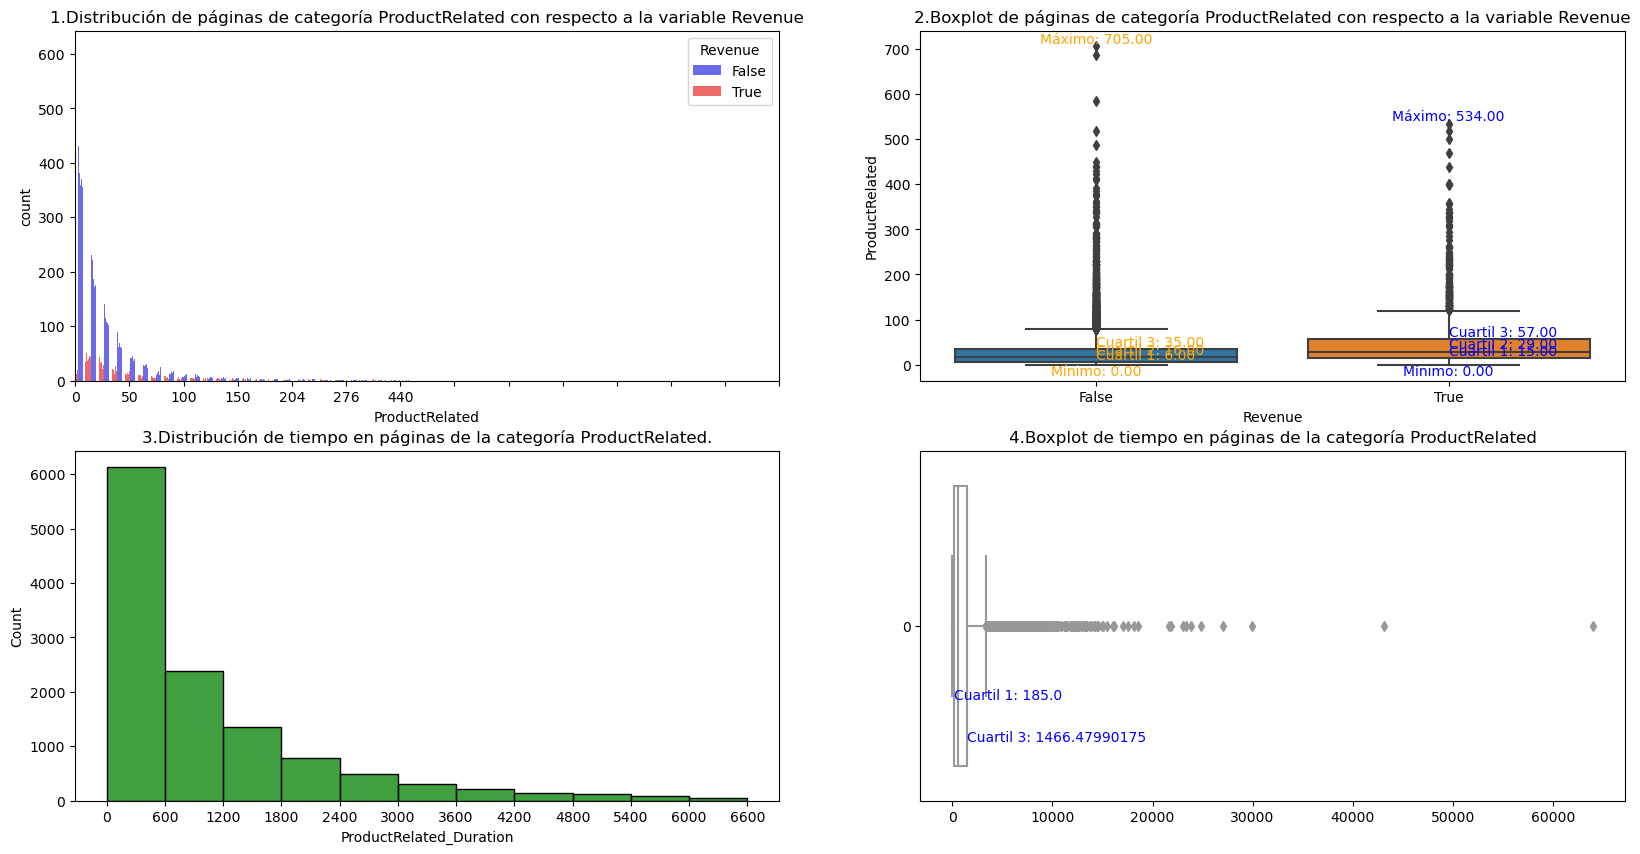

In [132]:
plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
plt.title('1.Distribución de páginas de categoría ProductRelated con respecto a la variable Revenue')
sns.countplot(x= 'ProductRelated', hue = 'Revenue', data = df_limpio, palette='seismic')
plt.xticks(np.arange(0, 700, 50))

plt.subplot(2, 2, 2)

sns.boxplot(x='Revenue', y='ProductRelated', data=df_limpio)

for cat, color in zip([True, False], ['blue', 'orange']):
    subset_data = df_limpio[df_limpio['Revenue'] == cat]['ProductRelated']
    min_val = subset_data.min()
    max_val = subset_data.max()
    quartiles = subset_data.quantile([0.25, 0.5, 0.75])

    plt.text(cat, max_val, f'Máximo: {max_val:.2f}', color=color, verticalalignment='bottom', horizontalalignment='center')
    plt.text(cat, min_val, f'Mínimo: {min_val:.2f}', color=color, verticalalignment='top', horizontalalignment='center')

    for i, q in enumerate(quartiles):
        plt.text(cat, q, f'Cuartil {i+1}: {q:.2f}', color=color, verticalalignment='bottom', horizontalalignment='left')


plt.title('2.Boxplot de páginas de categoría ProductRelated con respecto a la variable Revenue')

plt.subplot(2,2,3)

rangos=[0,600,1200,1800,2400,3000,3600,4200,4800,5400,6000,6600]
sns.histplot(df_limpio['ProductRelated_Duration'], bins = rangos, color='green')
plt.title('3.Distribución de tiempo en páginas de la categoría ProductRelated.')
plt.xticks(rangos)


plt.subplot(2, 2, 4)

ax=sns.boxplot(data=df_limpio['ProductRelated_Duration'], palette='seismic', orient='h')

maximo = df_limpio['ProductRelated_Duration'].max()
minimo = df_limpio['ProductRelated_Duration'].min()
q1 = df_limpio['ProductRelated_Duration'].quantile(0.25)
q3 = df_limpio['ProductRelated_Duration'].quantile(0.75)

ax.text(q1, 0.2, f'Cuartil 1: {q1}', verticalalignment='center', horizontalalignment='left', color='blue')
ax.text(q3, 0.3, f'Cuartil 3: {q3}', verticalalignment='top', horizontalalignment='left', color='blue')

plt.title('4.Boxplot de tiempo en páginas de la categoría ProductRelated')

plt.show()

- En la figura 1, se puede observar que la cantidad de visitas a páginas de esta categoría es mayor que en las otras categorías, la mayoría de las páginas de esta categoría tienen menos de 100 visitas.
- En la figura 2 del boxplot de visitas de ésta categoría, se confirma que los datos están acumulados por debajo de las 100 visitas, sin embargo, a comparación de las otras categorías, se observa que hay más visitas a páginas de ésta categoría que a las otras categorías analizadas anteriormente.
- En la figura 3 Respecto a la distribución del tiempo de duración de las visitas a las páginas de esta categoría se puede observar que en su mayoría las visitas duran cerca de 10 minutos (600 seg) y con una importante cantidad de visitas que duran hasta los 30 minutos lo que demuestra la importancia de esta categoría en el sitio web.
- En la figura 4 se observa que la duración de las visitas en su mayoría llegan hasta los 1500 segundos que es mucho mayor a las otras categorías, de todos modos los datos de ésta variable también está sesgados a la derecha y tiene valores atípicos que tendrán que ser normalizados para usarlos en la construcción de un modelo.

#### Análisis de distribución de variables BounceRates y ExitRates:

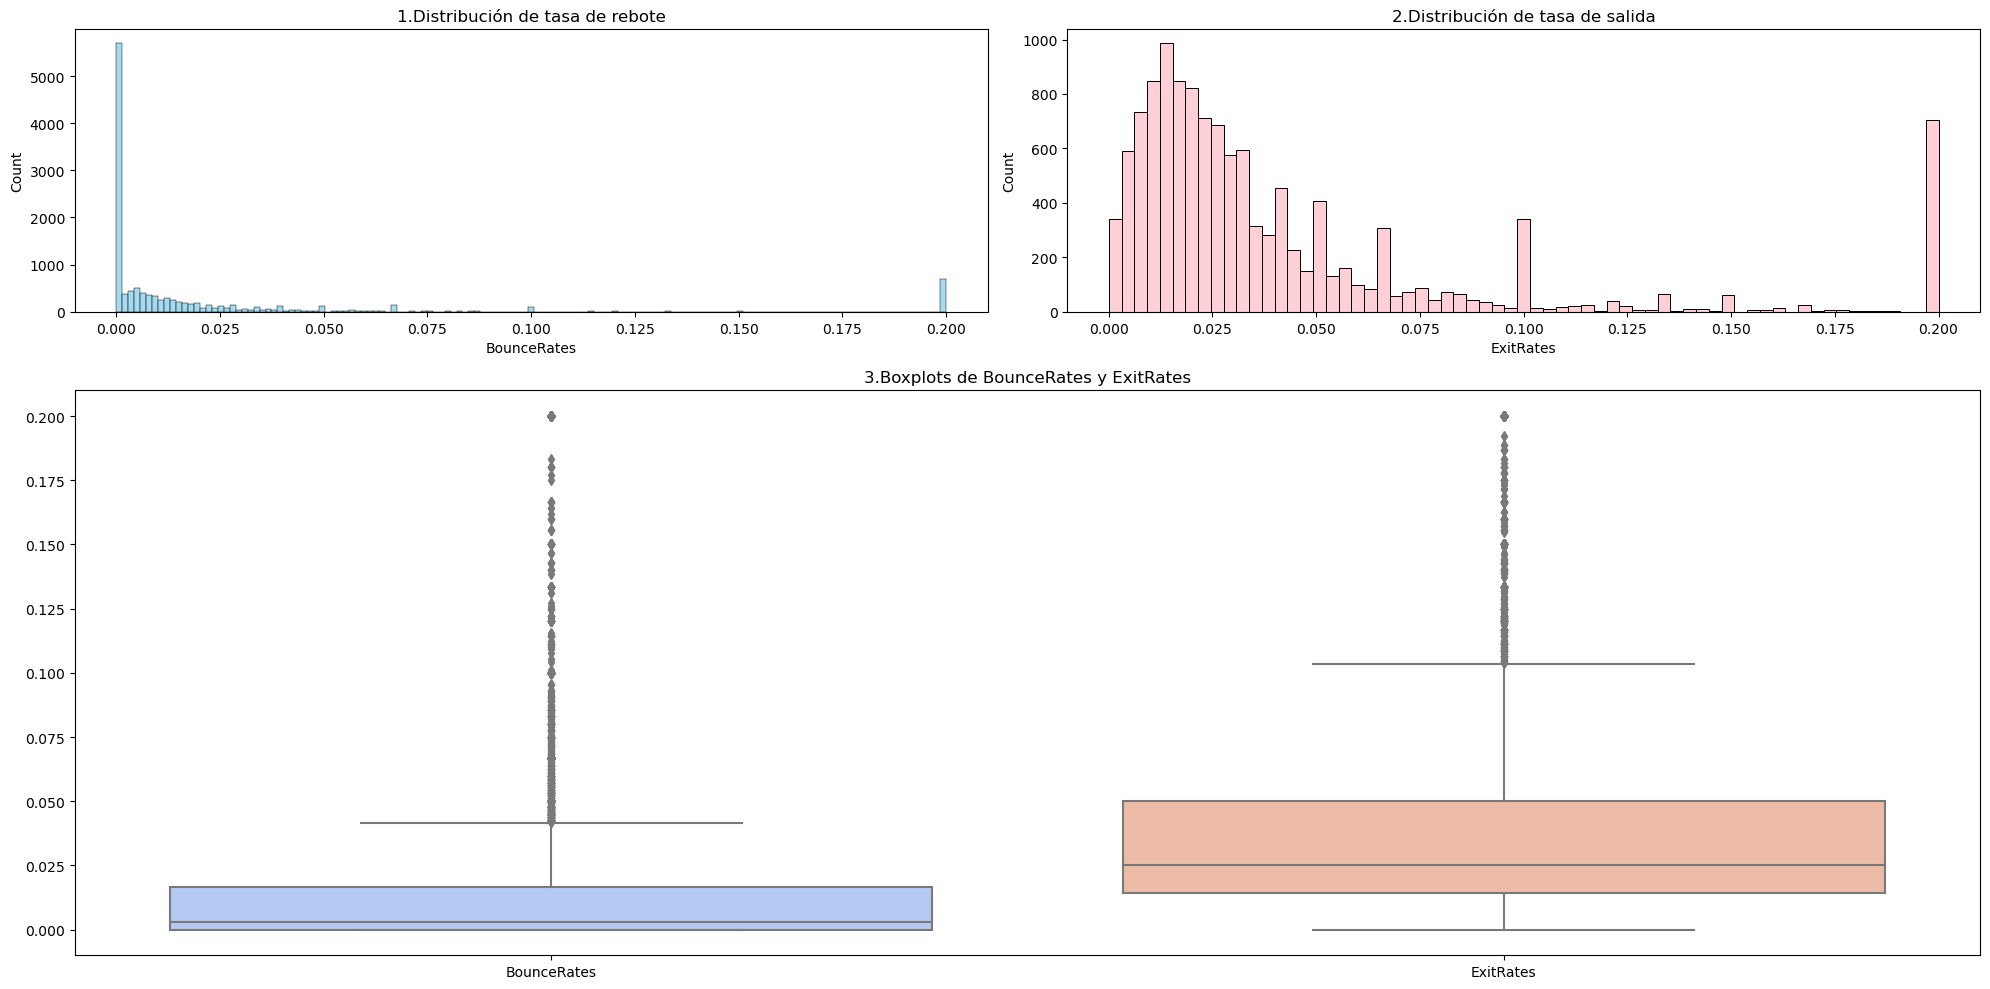

In [133]:
plt.figure(figsize=(20, 10))

grid = plt.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 2])

plt.subplot(grid[0, 0])

rangos=[0,60,120,180,240,300,360,420,480]
sns.histplot(df_limpio['BounceRates'],color='skyblue')
plt.title('1.Distribución de tasa de rebote')

plt.subplot(grid[0, 1])

rangos=[0,60,120,180,240,300,360,420,480]
sns.histplot(df_limpio['ExitRates'],color='pink')
plt.title('2.Distribución de tasa de salida')

plt.subplot(grid[1, :])
columnas_boxplot = ["BounceRates", "ExitRates"]
df_boxplot = df_limpio[columnas_boxplot]
sns.boxplot(data=df_boxplot, palette='coolwarm')
plt.title('3.Boxplots de BounceRates y ExitRates')

plt.tight_layout()

plt.show()

- En la figura 1, la tasa de rebote no tiene una distribución normal ya que cuenta con outliers en los valores del 20%, a demás vemos que la distribución esta fuertemente sesgada a la derecha.
- En la figura 2, respecto a la tasa de salida tambien existen outliers cerca al 20%, además esta variable no cuenta con una distribución normal ya que esta sesgada a la derecha.
- En la figura 3 se compara los boxplot de BounceRates y ExitRates donde se puede observar que ambos están sesgados a la derecha y que BounceRates está mas sesgado a la derecha que ExitRates ya que la media de Exit rates está por encima de la media de BounceRates, ambos tienen valores atípicos que tendrán que normalizarse para incluir estas variables en el modelo.

#### Análisis de variable PageValues:

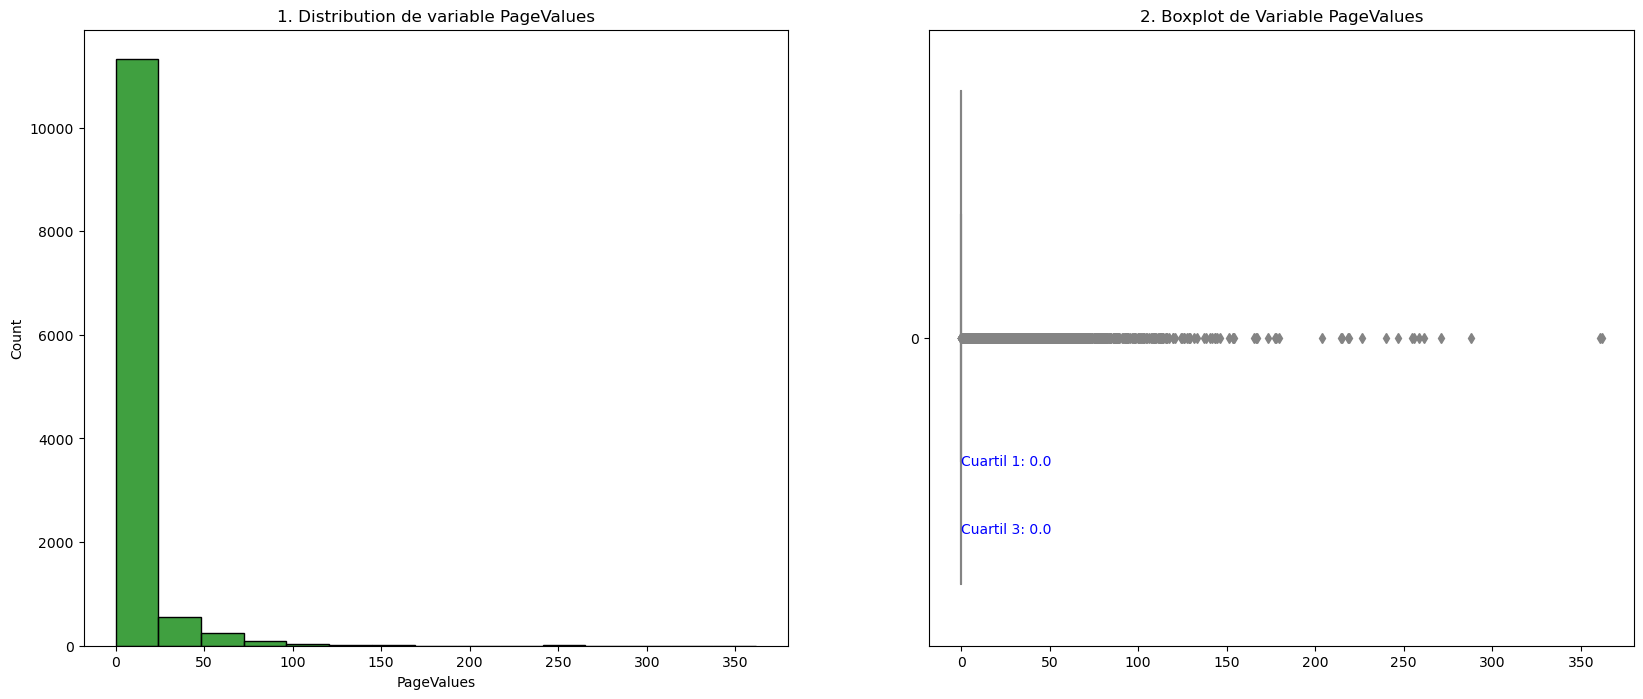

In [134]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)

sns.histplot(df_limpio['PageValues'], color='green')
plt.title('1. Distribution de variable PageValues')

plt.subplot(1, 2, 2)

ax=sns.boxplot(data=df_limpio['PageValues'], palette='coolwarm', orient='h')

maximo = df_limpio['PageValues'].max()
minimo = df_limpio['PageValues'].min()
q1 = df_limpio['PageValues'].quantile(0.25)
q3 = df_limpio['PageValues'].quantile(0.75)

ax.text(q1, 0.2, f'Cuartil 1: {q1}', verticalalignment='center', horizontalalignment='left', color='blue')
ax.text(q3, 0.3, f'Cuartil 3: {q3}', verticalalignment='top', horizontalalignment='left', color='blue')

plt.title('2. Boxplot de Variable PageValues')

plt.show()

- En ambos gráficos se puede observar que la gran mayoría de visitas han sido a páginas que no han concretados en una venta, ya que se puede ver tanto en el gráfico de distribución como en el boxplot que los datos estan acumulados hacia las páginas con valor cero.

#### Análisis de variable Month Vs Revenue:

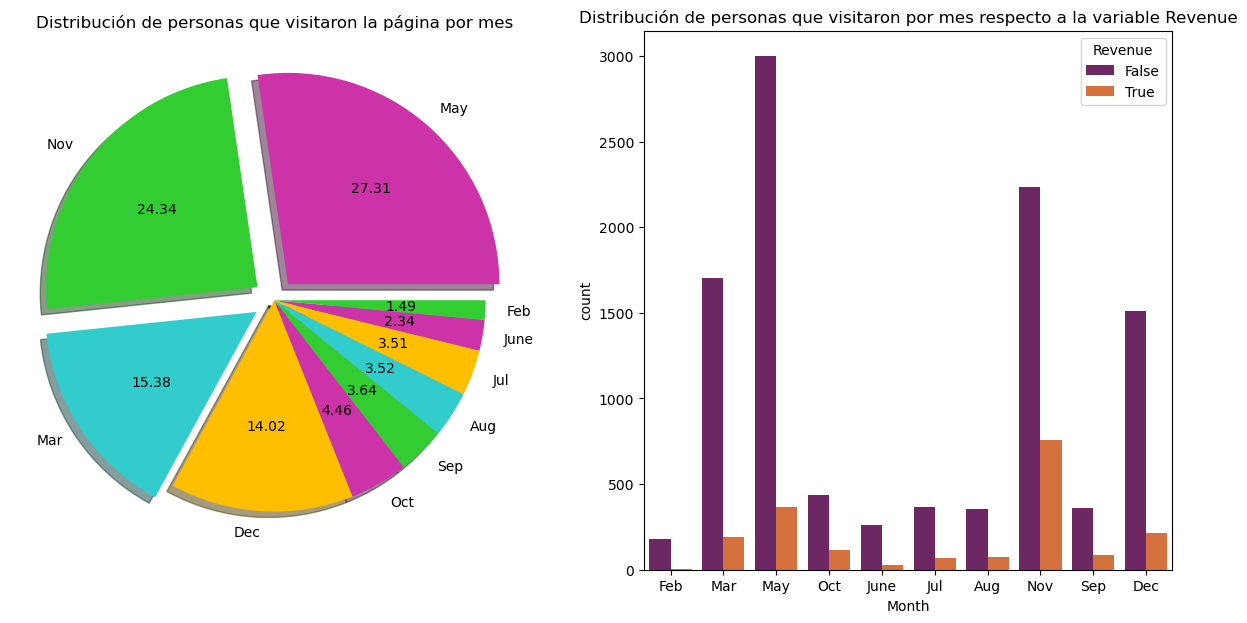

In [135]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
plt.title('Distribución de personas que visitaron la página por mes')
plt.pie(x = df_limpio['Month'].value_counts(),
       labels = ['May', 'Nov', 'Mar', 'Dec', 'Oct', 'Sep', 'Aug', 'Jul', 'June', 'Feb'],
       autopct='%.2f',
       colors=['#CC33A6','#33CC33','#33CCCC','#FFBF00'],
       shadow = True,
       explode = (0.1,0.1,0.1,0,0,0,0,0,0,0))


plt.subplot(1,2,2)
plt.title('Distribución de personas que visitaron por mes respecto a la variable Revenue')
sns.countplot(x= 'Month', hue = 'Revenue', data = df_limpio, palette='inferno')
plt.show()

- En Mayo y Noviembre se tiene la mayor cantidad de visitas a la página.
- Si comparamos las visitas con los ingresos (Revenue) se puede observar que hay mas ingresos en los meses de noviembre y mayo.

#### Análisis de variable Region Vs Revenue:

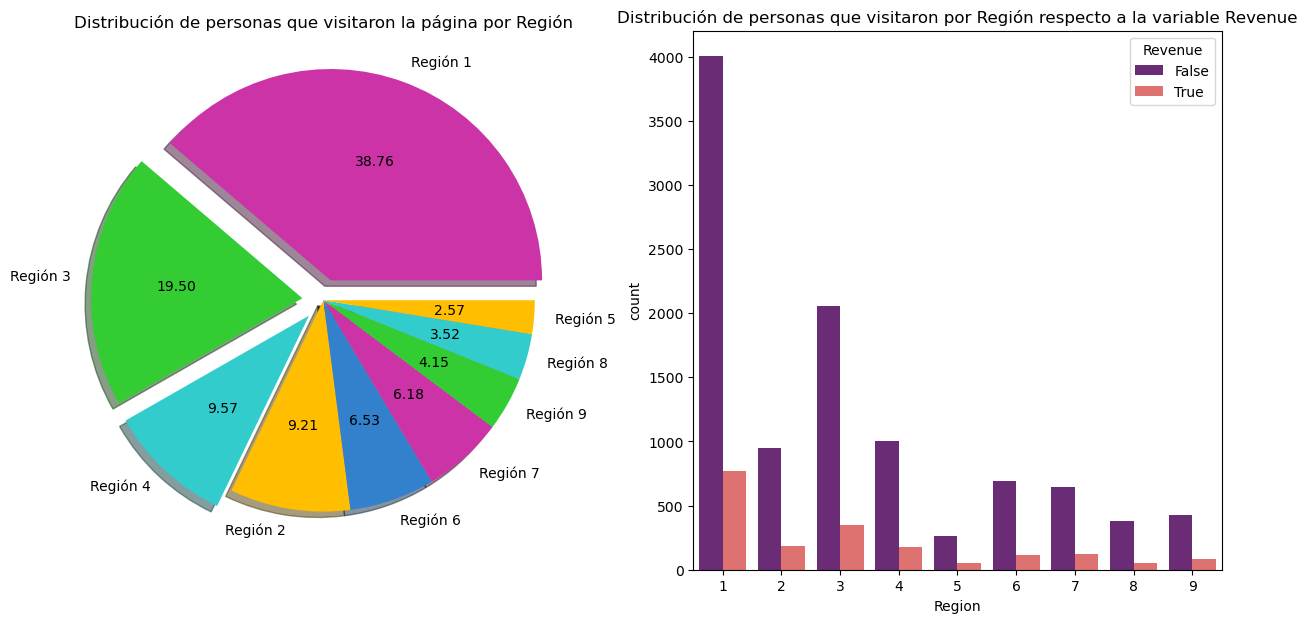

In [136]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
region_counts = df_limpio['Region'].value_counts()
region_labels = [f'Región {region}' for region in region_counts.index]

plt.title('Distribución de personas que visitaron la página por Región')
plt.pie(x=region_counts,
        labels=region_labels,
        autopct='%.2f',
        colors=['#CC33A6', '#33CC33', '#33CCCC', '#FFBF00', '#3380CC'],
        shadow=True,
        explode = (0.1,0.1,0.1,0,0,0,0,0,0))
       
plt.subplot(1,2,2)
plt.title('Distribución de personas que visitaron por Región respecto a la variable Revenue')
sns.countplot(x= 'Region', hue = 'Revenue', data = df_limpio, palette='magma')
plt.show()

- En el gráfico de pie se observa que las regiones de las que provienen la mayoría de las visitas son las regiones 1, 3 y 4.
- Los visitantes de las regiones 1, 3 y 4 también son los que generan más ingresos (revenue) en comparación a las otras regiones, por que se debe tener en cuenta esta información para ajustar las estrategias de marketing. 

#### Análisis de variable OperatingSystems y Browser Vs Revenue:

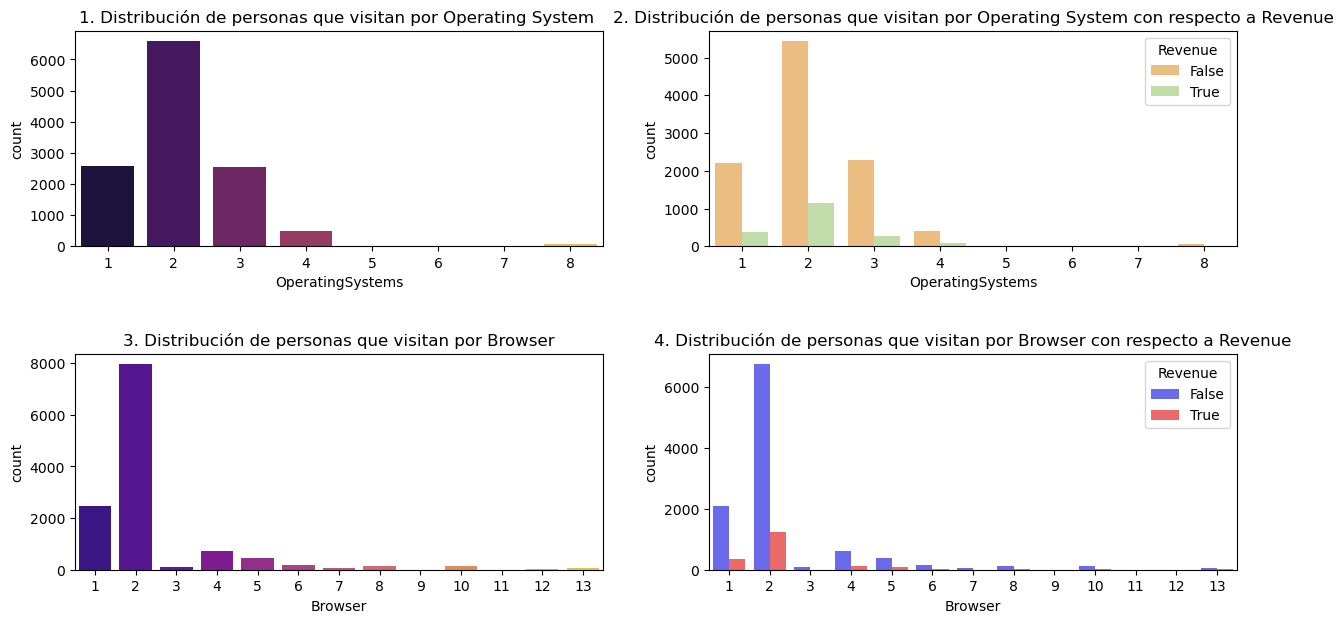

In [137]:
plt.figure(figsize = (15,7))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2,2,1)
plt.title('1. Distribución de personas que visitan por Operating System ')
sns.countplot(x = df_limpio['OperatingSystems'] , palette='inferno')

plt.subplot(2,2,2)
plt.title('2. Distribución de personas que visitan por Operating System con respecto a Revenue')
sns.countplot(x= 'OperatingSystems', hue = 'Revenue', data = df_limpio, palette='Spectral')

plt.subplot(2,2,3)
plt.title('3. Distribución de personas que visitan por Browser')
sns.countplot(x = df_limpio['Browser'] , palette='plasma')

plt.subplot(2,2,4)
plt.title('4. Distribución de personas que visitan por Browser con respecto a Revenue')
sns.countplot(x= 'Browser', hue = 'Revenue', data = df_limpio, palette='seismic')
plt.show()

- Como se puede apreciar en el gráfico 1, la mayoría de los visitantes al sitio web, usan el sistema operativo 2.
- En el gráfico 2 se puede observar tambien que los usuarios con el sistema operativo 2 son los que brindan mayor volumen de ingresos (Revenue).
- En el gráfico 3 se puede observar que la mayoría de los visitantes usan el Browser 2, entonces se tiene que optimizar la página para que sea compatible con este Browser.
- En el gráfico 4 se observa que la mayoría de los ingresos provienen de usuarios que usan el Browser 2.

#### Análisis de SpecialDay con respecto a la variable Revenue :

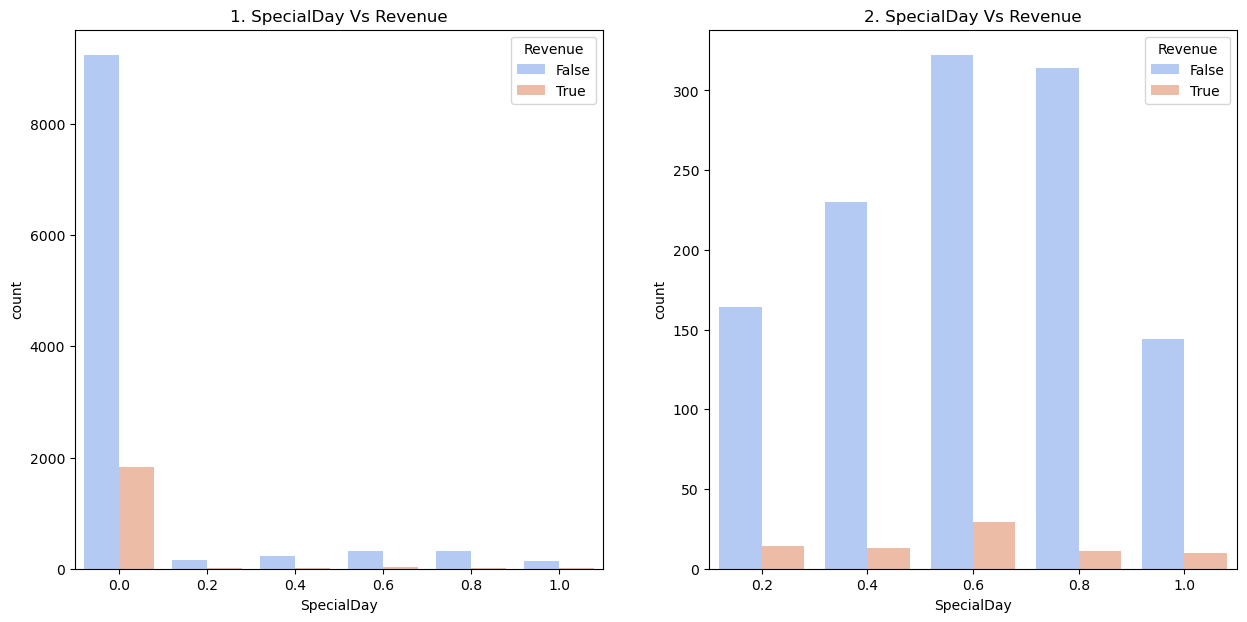

In [138]:
plt.figure(figsize = (15,7))

plt.subplot(1, 2, 1)
plt.title('1. SpecialDay Vs Revenue')
sns.countplot(x= 'SpecialDay', hue = 'Revenue', data = df_limpio, palette='coolwarm')

plt.subplot(1, 2, 2)
plt.title('2. SpecialDay Vs Revenue')
df_filtrado = df_limpio[df_limpio['SpecialDay'] > 0]
sns.countplot(x= 'SpecialDay', hue = 'Revenue', data = df_filtrado, palette='coolwarm')
plt.show()

- En el gráfico 1 se puede observar que la mayoría de las ventas se dan en días no especiales.

- Para verificar como es el comportamiento de los clientes en días especiales, podemos observar en el gráfico 2 que los ingresos tienen una distribución normal con un pico de revenue cuando la cercanía al día especial es el 60%(0.6)

#### Análisis de variables: VisitorType Vs Revenue

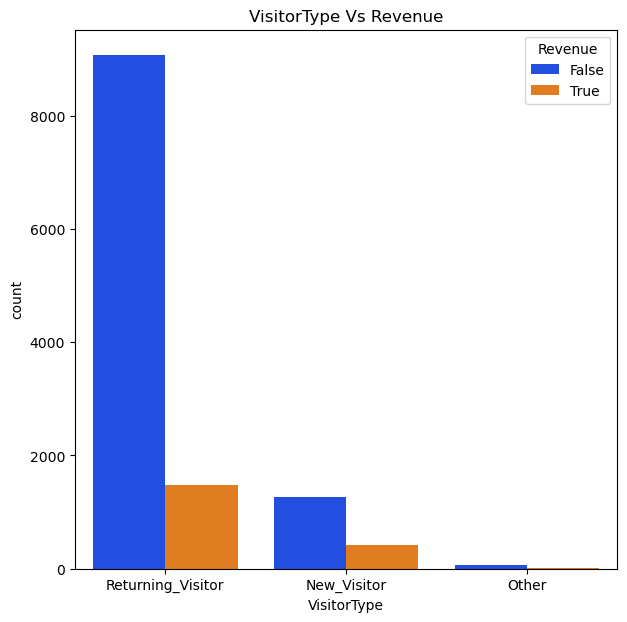

In [139]:
plt.figure(figsize = (7,7))
plt.title('VisitorType Vs Revenue')
sns.countplot(x= 'VisitorType', hue = 'Revenue', data = df_limpio, palette='bright')
plt.show()

En la gráfica se observa que los visitantes recurrentes generan un mayor volumen de ingresos(Revenue) que los nuevos visitantes y otros visitantes, es importante cuidar a los clientes recurrentes y fidelizar a los nuevos visitantes.

#### Análisis de variables: Weekend Vs Revenue

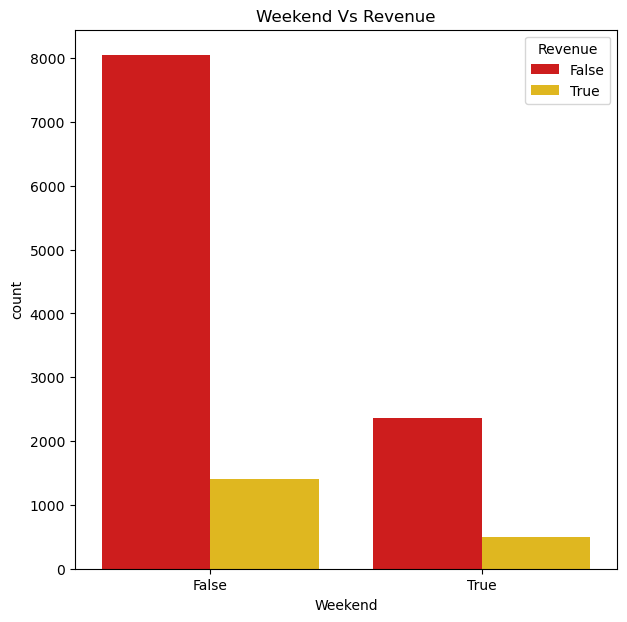

In [140]:
plt.figure(figsize = (7,7))
plt.title('Weekend Vs Revenue')
sns.countplot(x= 'Weekend', hue = 'Revenue', data = df_limpio, palette='hot')
plt.show()

 - En el gráfico se evidencia que durante los fines de semana se vende menos que en días de semana lo cual es un indicador importante para ajustar las estrategias de marketing priorizando los días de semana para lanzar campañas.

#### Análisis de Correlación de Variables

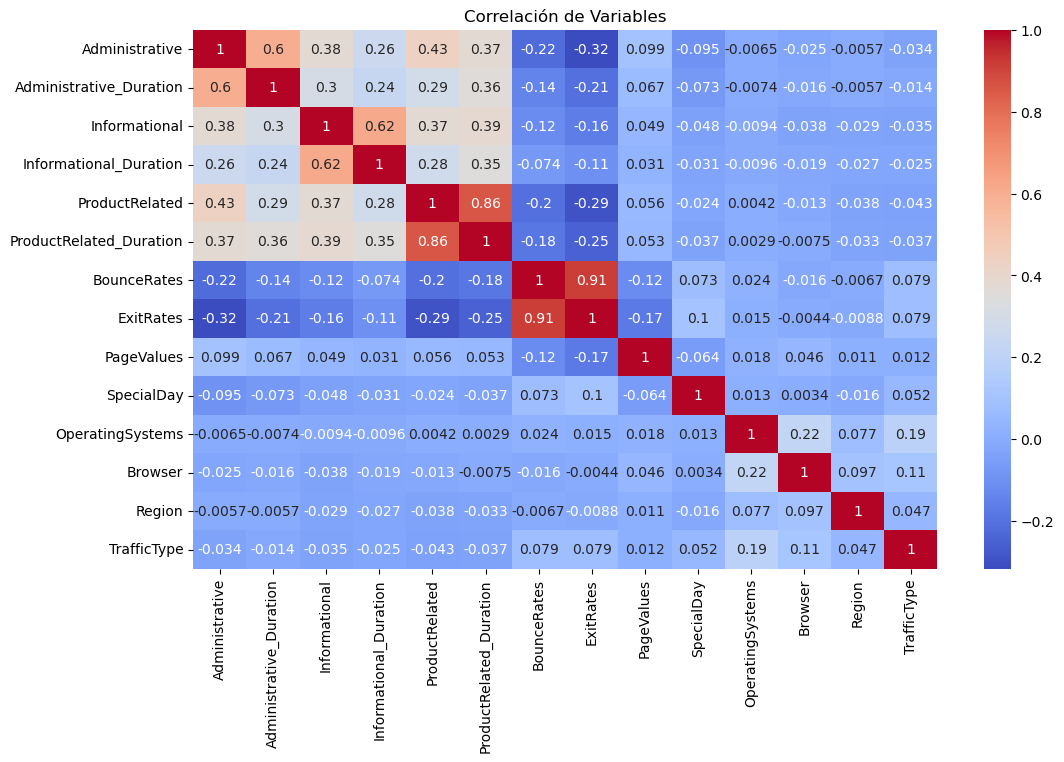

In [141]:
plt.figure(figsize = (12,7))
sns.heatmap(df_limpio[columnas_continuas].corr(), annot = True, cmap='coolwarm')
plt.title('Correlación de Variables')
plt.show()

### Tratamiento de variables correlacionadas:

Agruparemos las variables altamente correlacionadas para evitar la multicolinealidad en los modelos.

<Axes: >

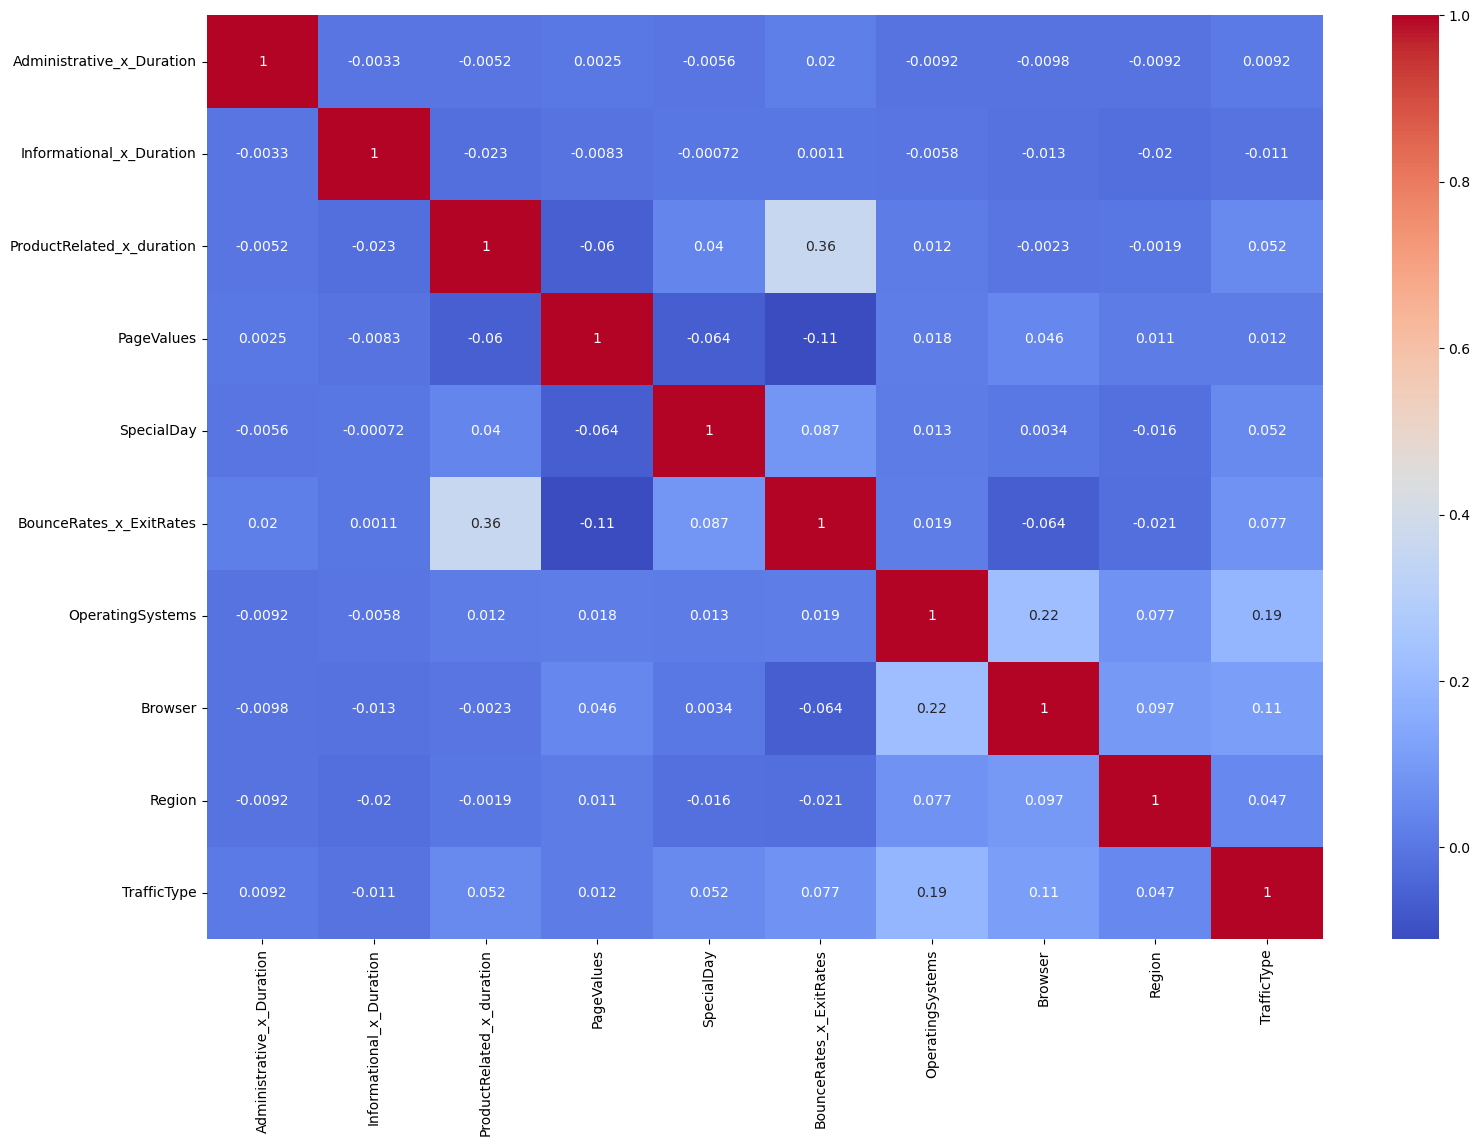

In [142]:
df_limpio['ProductRelated_x_duration'] = df_limpio['ProductRelated']/(df_limpio['ProductRelated_Duration']+0.00001)
df_limpio['Administrative_x_Duration'] = df_limpio['Administrative']/(df_limpio['Administrative_Duration']+0.00001)
df_limpio['Informational_x_Duration'] = df_limpio['Informational']/(df_limpio['Informational_Duration']+0.00001)
df_limpio['BounceRates_x_ExitRates'] = df_limpio['BounceRates']/(df_limpio['ExitRates']+0.00001)
def seleccionar_columnas(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame
columnas = ['Administrative_x_Duration','Informational_x_Duration','ProductRelated_x_duration','PageValues','SpecialDay','Month','BounceRates_x_ExitRates',
       'OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue']
df_tratado = seleccionar_columnas(df_limpio,columnas)
plt.figure(figsize=(18,12))
columnas_continuas = df_tratado.select_dtypes(include=['float64', 'int64','int']).columns
sns.heatmap(df_tratado[columnas_continuas].corr(),annot=True, cmap='coolwarm')

### Tratamiento de variables categóricas:

In [143]:
{column: list(df_tratado[column].unique()) for column in df_tratado.columns if df_tratado.dtypes[column] == 'object'}

{'Month': ['Feb',
  'Mar',
  'May',
  'Oct',
  'June',
  'Jul',
  'Aug',
  'Nov',
  'Sep',
  'Dec'],
 'VisitorType': ['Returning_Visitor', 'New_Visitor', 'Other']}

In [144]:
label_encoder = LabelEncoder()

Codificando la columna meses:

In [145]:
meses_mapping = {'Feb': 2, 'Mar': 3, 'May': 5, 'June': 6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

df_tratado['mes_codificado'] = df_tratado['Month'].map(meses_mapping)

Codificando la columna VisitorType:

In [146]:
onehot_encoder = OneHotEncoder(sparse=False)

visitante_codificado = onehot_encoder.fit_transform(df_tratado[['VisitorType']])

df_codificado = pd.concat([df_tratado, pd.DataFrame(visitante_codificado, columns=onehot_encoder.get_feature_names_out(['VisitorType']))], axis=1)
df_codificado['VisitorType_New_Visitor'] = df_codificado['VisitorType_New_Visitor'].astype(int)
df_codificado['VisitorType_Other'] = df_codificado['VisitorType_Other'].astype(int)
df_codificado['VisitorType_Returning_Visitor'] = df_codificado['VisitorType_Returning_Visitor'].astype(int)

Codificando las columnas Weekend y Revenue:

In [147]:
df_codificado['Weekend'] = df_codificado['Weekend'].astype(int)
df_codificado['Revenue'] = df_codificado['Revenue'].astype(int)

In [148]:
df_codificado

,Administrative_x_Duration,Informational_x_Duration,ProductRelated_x_duration,PageValues,SpecialDay,Month,BounceRates_x_ExitRates,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,mes_codificado,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.000000,0.0,100000.000000,0.000000,0.0,Feb,0.999950,1,1,1,1,Returning_Visitor,0,0,2,0,0,1
1,0.000000,0.0,0.031250,0.000000,0.0,Feb,0.000000,2,2,1,2,Returning_Visitor,0,0,2,0,0,1
2,-0.000000,-0.0,-1.000010,0.000000,0.0,Feb,0.999950,4,1,9,3,Returning_Visitor,0,0,2,0,0,1
3,0.000000,0.0,0.749997,0.000000,0.0,Feb,0.357117,3,2,2,4,Returning_Visitor,0,0,2,0,0,1
4,0.000000,0.0,0.015936,0.000000,0.0,Feb,0.399920,3,3,1,4,Returning_Visitor,1,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,0.020690,0.0,0.029712,12.241717,0.0,Dec,0.245961,4,6,1,1,Returning_Visitor,1,0,12,0,0,1
12312,0.000000,0.0,0.010735,0.000000,0.0,Nov,0.000000,3,2,1,8,Returning_Visitor,1,0,11,0,0,1
12313,0.000000,0.0,0.032564,0.000000,0.0,Nov,0.961428,3,2,1,13,Returning_Visitor,1,0,11,0,0,1
12314,0.053333,0.0,0.043353,0.000000,0.0,Nov,0.000000,2,2,3,11,Returning_Visitor,0,0,11,0,0,1


Retirando las columnas que ya no usaremos:

In [149]:
df_codificado = df_codificado.drop(['Month'], axis=1)
df_codificado = df_codificado.drop(['VisitorType'], axis=1)

In [150]:
df_codificado

,Administrative_x_Duration,Informational_x_Duration,ProductRelated_x_duration,PageValues,SpecialDay,BounceRates_x_ExitRates,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,mes_codificado,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.000000,0.0,100000.000000,0.000000,0.0,0.999950,1,1,1,1,0,0,2,0,0,1
1,0.000000,0.0,0.031250,0.000000,0.0,0.000000,2,2,1,2,0,0,2,0,0,1
2,-0.000000,-0.0,-1.000010,0.000000,0.0,0.999950,4,1,9,3,0,0,2,0,0,1
3,0.000000,0.0,0.749997,0.000000,0.0,0.357117,3,2,2,4,0,0,2,0,0,1
4,0.000000,0.0,0.015936,0.000000,0.0,0.399920,3,3,1,4,1,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,0.020690,0.0,0.029712,12.241717,0.0,0.245961,4,6,1,1,1,0,12,0,0,1
12312,0.000000,0.0,0.010735,0.000000,0.0,0.000000,3,2,1,8,1,0,11,0,0,1
12313,0.000000,0.0,0.032564,0.000000,0.0,0.961428,3,2,1,13,1,0,11,0,0,1
12314,0.053333,0.0,0.043353,0.000000,0.0,0.000000,2,2,3,11,0,0,11,0,0,1


#### Separando la variable dependiente, variables Independientes y Variables independientes continuas:

In [151]:
df_y = df_codificado['Revenue'].copy()
df_x = df_codificado.drop('Revenue', axis=1)

columnas_continuas=['Administrative_x_Duration', 'Informational_x_Duration', 'ProductRelated_x_duration', 'PageValues','BounceRates_x_ExitRates']
df_x_continua=df_codificado[columnas_continuas]

### Estandarización de Variables Independientes Continuas:

#### Verificando las distribuciones originales:

In [152]:
def plot_qqplot(df, return_type='axes', title='Comprobación de distribución', type_transformation=""):
    '''
    '''
    fig_tot = (len(df.columns))
    fig_por_fila = 3
    tamanio_fig  = 3
    num_filas = int( np.ceil(fig_tot/fig_por_fila) )    
    plt.figure( figsize=( fig_por_fila*tamanio_fig+5, num_filas*tamanio_fig+2 ) )
    c = 0 
    plt.subplots_adjust(hspace=0.5)

    for i, col in enumerate(df.columns):
        ax = plt.subplot(num_filas, fig_por_fila, i+1)
        probplot(x = df[df.columns[i]], dist=norm, plot=ax)
        plt.title(df.columns[i])

    plt.suptitle(title + " " + type_transformation)
    plt.show()

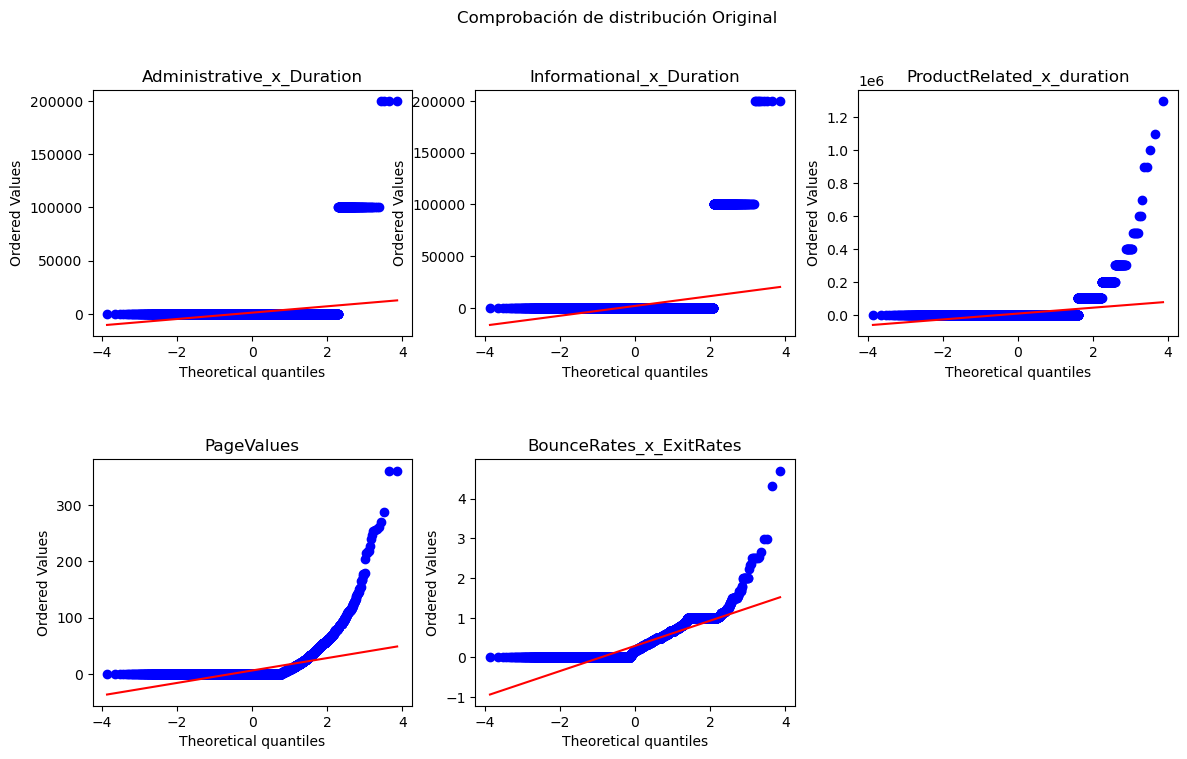

In [153]:
plot_qqplot(df= df_x_continua, type_transformation="Original")

#### Observamos que los datos de las variables tienen ouliers y están sesgados por lo que optaremos por la Estandarización Yeo Johnson, ya que este tipo de Estandarización tiene un mejor tratamiento de datos con outliers y sesgados.

#### Normalización por el método Yeo Johnson:

In [154]:
scaler = PowerTransformer(method='yeo-johnson') 

df_codificado_yeo = pd.DataFrame(
    scaler.fit_transform(df_x_continua),
    columns = df_x_continua.columns
)

df_codificado_yeo.head(10)


,Administrative_x_Duration,Informational_x_Duration,ProductRelated_x_duration,PageValues,BounceRates_x_ExitRates
0,-0.399512,-0.297467,3.584208,-0.529786,1.578763
1,-0.399512,-0.297467,-0.224481,-0.529786,-0.993215
2,-0.399512,-0.297467,-9.350855,-0.529786,1.578763
3,-0.399512,-0.297467,1.326130,-0.529786,0.590136
4,-0.399512,-0.297467,-0.281227,-0.529786,0.701794
5,-0.399512,-0.297467,0.083893,-0.529786,1.175304
6,-0.399512,-0.297467,-9.350855,-0.529786,1.578763
7,-42.196021,-0.297467,-9.350855,-0.529786,1.578763
8,-0.399512,-0.297467,-0.143018,-0.529786,-0.993215
9,-0.399512,-0.297467,-0.326401,-0.529786,-0.993215


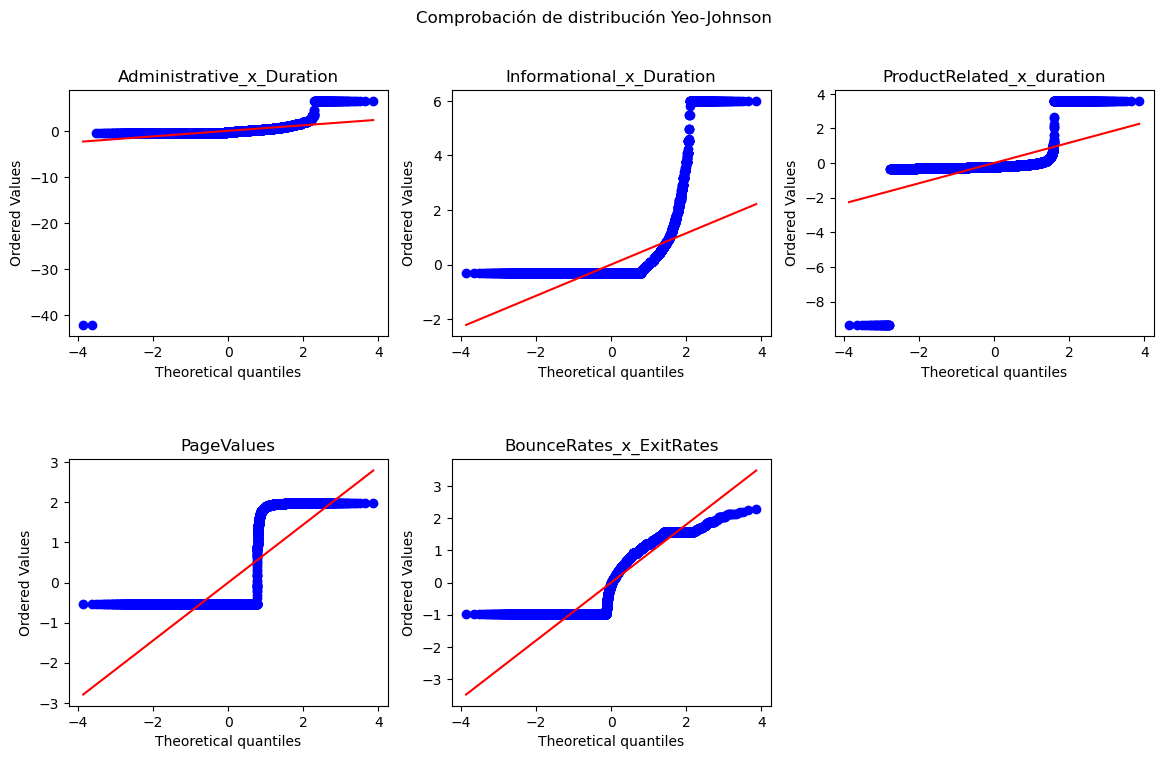

In [155]:
plot_qqplot(df = df_codificado_yeo, type_transformation = "Yeo-Johnson")

#### Como podemos observar el método de Yeo Johnson, ha estandarizado las variables que se adaptarán mejor a modelos de clasificación y regresiones logísticas y de aprendizaje automático que se perfilan como mejores inputs para implementar nuestros modelos de aprendizaje para el dataset.

In [156]:
df_x['Administrative_x_Duration']=df_codificado_yeo['Administrative_x_Duration']
df_x['Informational_x_Duration']=df_codificado_yeo['Informational_x_Duration']
df_x['ProductRelated_x_duration']=df_codificado_yeo['ProductRelated_x_duration']
df_x['PageValues']=df_codificado_yeo['PageValues']
df_x['BounceRates_x_ExitRates']=df_codificado_yeo['BounceRates_x_ExitRates']

### Tratamiento de Outliers

Evaluamos los valores mínimos, máximos, la media y los cuantiles del DataFrame

In [157]:
df_x_continua.describe()

,Administrative_x_Duration,Informational_x_Duration,ProductRelated_x_duration,PageValues,BounceRates_x_ExitRates
count,12316.000000,12316.000000,1.231600e+04,12316.000000,12316.000000
mean,1120.524591,1908.098165,7.908451e+03,5.895952,0.292144
std,10830.463097,14205.611055,4.188970e+04,18.577926,0.354905
min,-1.000010,0.000000,-1.000010e+00,0.000000,0.000000
25%,0.000000,0.000000,2.189622e-02,0.000000,0.000000
50%,0.009957,0.000000,3.426480e-02,0.000000,0.171892
75%,0.046512,0.000000,5.590921e-02,0.000000,0.499950
max,200000.000000,200000.000000,1.300000e+06,361.763742,4.708623


In [158]:
def plot_box_plot(df_object):
    """
    """
    plt.figure(figsize=(15,7))
    ax = sns.boxplot(data=df_object)

    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.title('Representación de cajas de las variables independientes X')
    plt.ylabel('Valor de la variable')
    _ = plt.xlabel('Nombbre de la variable')
    plt.show()

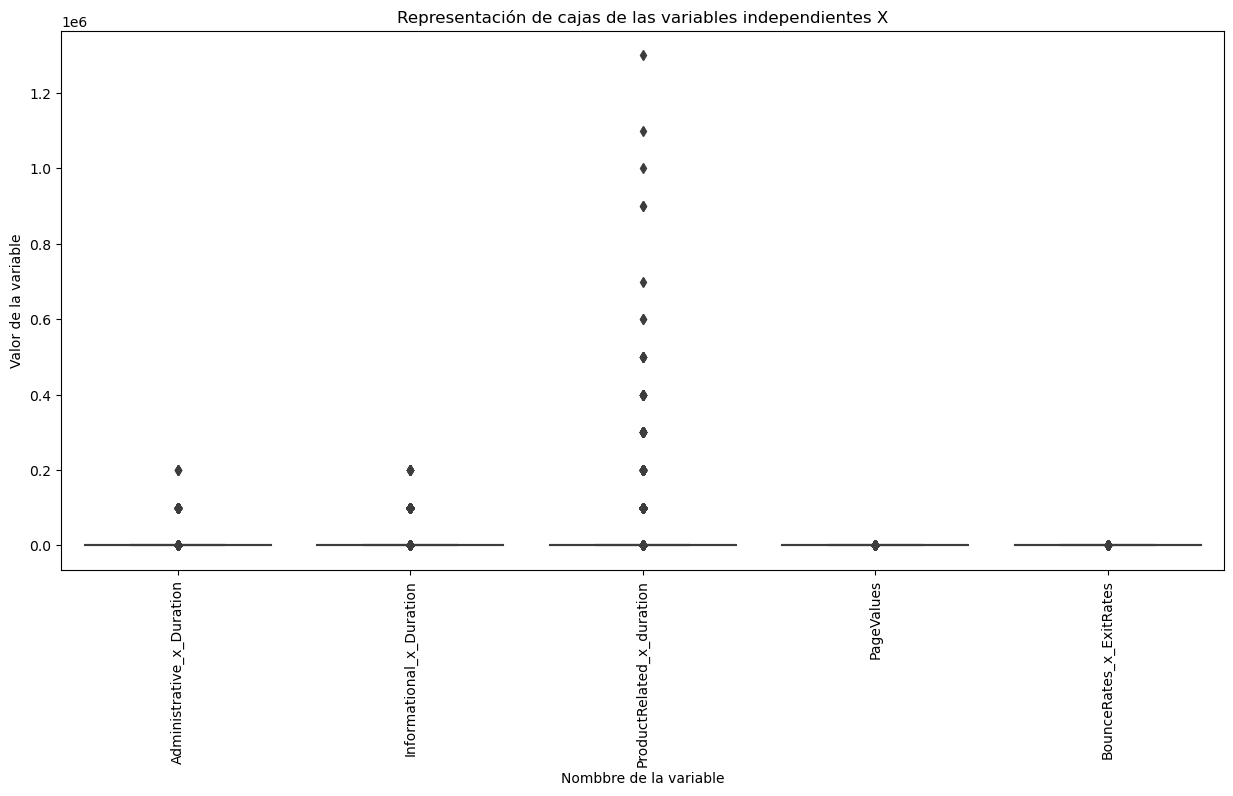

In [159]:
plot_box_plot(df_object=df_x_continua)

#### Se puede observar que existen muchos outliers en las variables independientes, que trataremos a continuación:

### Eliminando Outliers en base a la Regla IQR:

In [160]:
df_codificado_no_outliers = df_x_continua.copy()

for k in list(df_codificado_no_outliers.columns):
    IQR = np.percentile(df_codificado_no_outliers[k],75) - np.percentile(df_codificado_no_outliers[k],25)
    
    limite_superior = np.percentile(df_codificado_no_outliers[k],75) + 1.5*IQR
    limite_inferior = np.percentile(df_codificado_no_outliers[k],25) - 1.5*IQR
    
    df_codificado_no_outliers[k] = np.where(df_codificado_no_outliers[k] > limite_superior, limite_superior, df_codificado_no_outliers[k])
    df_codificado_no_outliers[k] = np.where(df_codificado_no_outliers[k] < limite_inferior, limite_inferior, df_codificado_no_outliers[k])

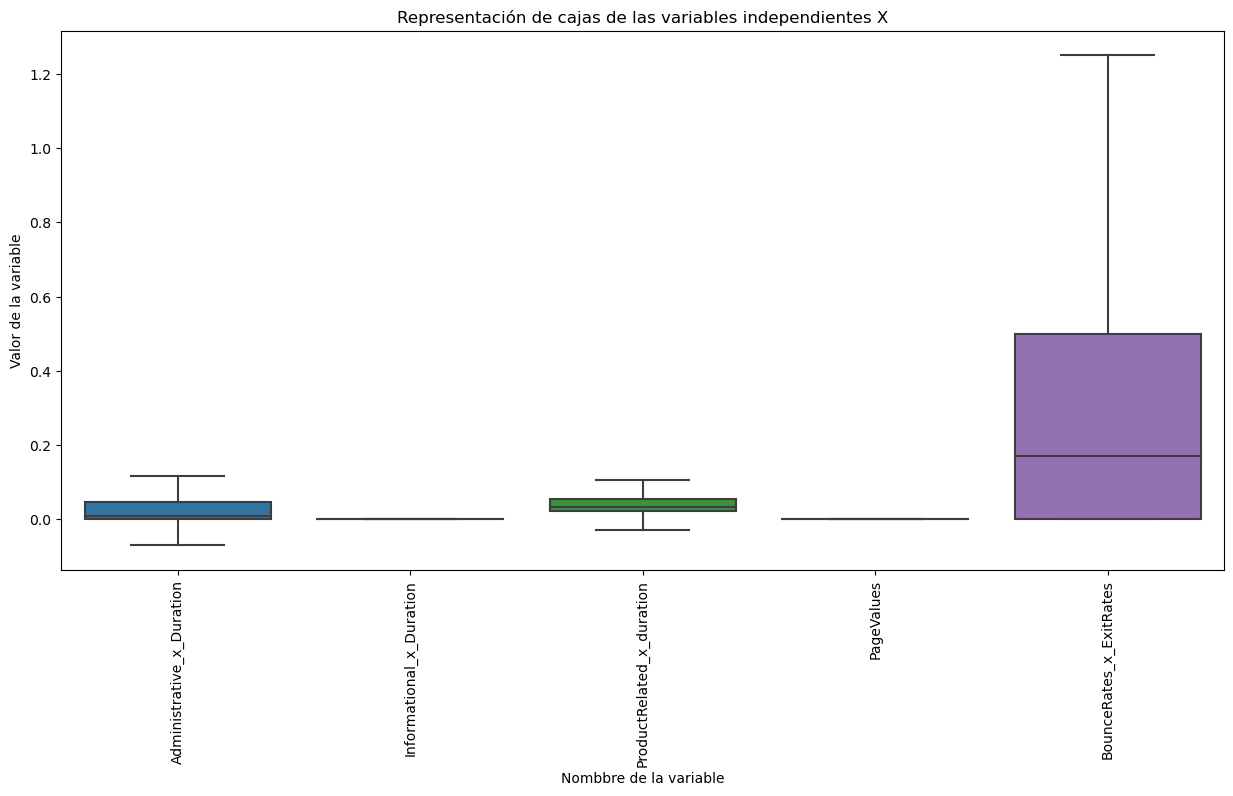

In [161]:
plot_box_plot(df_object=df_codificado_no_outliers)

Se han eliminado los outliers y se verificará la distribución de los datos:

In [162]:
df_codificado_no_outliers.describe()

,Administrative_x_Duration,Informational_x_Duration,ProductRelated_x_duration,PageValues,BounceRates_x_ExitRates
count,12316.000000,12316.0,12316.000000,12316.0,12316.000000
mean,0.027749,0.0,0.043160,0.0,0.288563
std,0.036356,0.0,0.029492,0.0,0.338708
min,-0.069767,0.0,-0.029123,0.0,0.000000
25%,0.000000,0.0,0.021896,0.0,0.000000
50%,0.009957,0.0,0.034265,0.0,0.171892
75%,0.046512,0.0,0.055909,0.0,0.499950
max,0.116279,0.0,0.106929,0.0,1.249875


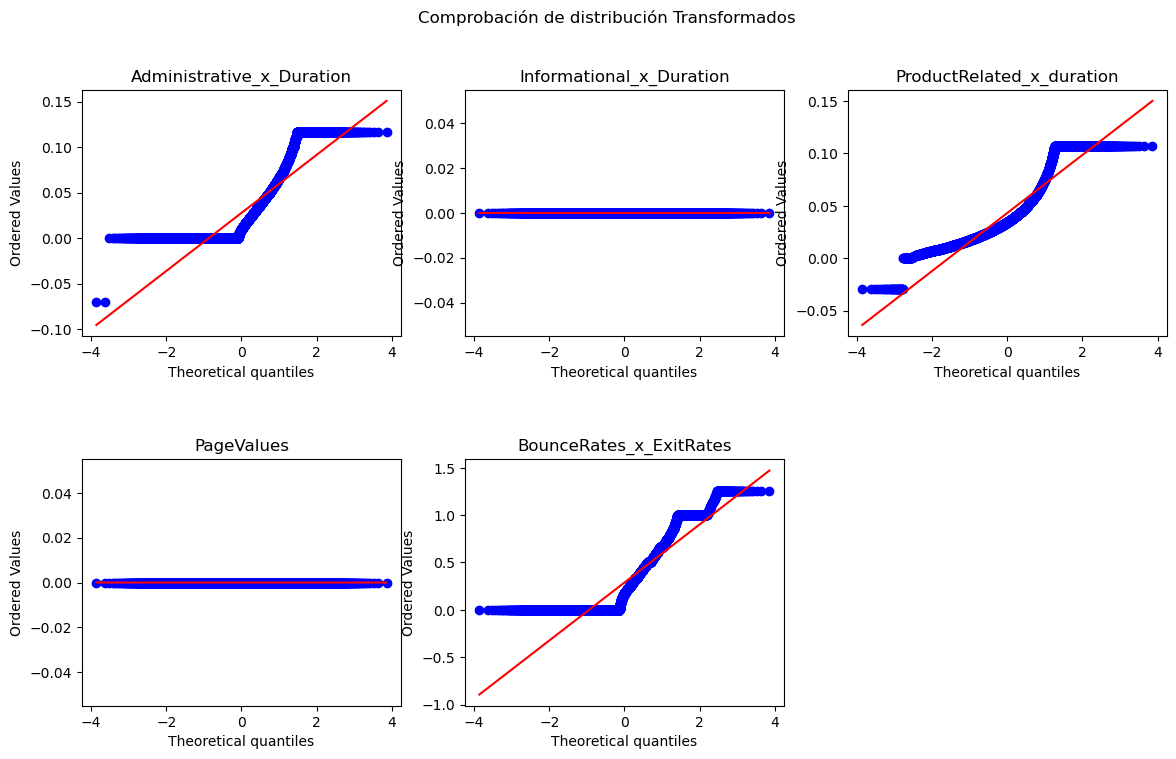

In [163]:
plot_qqplot(df= df_codificado_no_outliers, type_transformation="Transformados")

**Vemos que dos variables (Informational_x_Duration y PagesValues) pierden información de su distribución al eliminar los outliers por lo que sólo se aplicará la eliminación de Outliers a las otras 3 variables.**

#### Actualizando variables Independientes, incluyendo Variables contínuas sin Outliers.

In [164]:
df_x['Administrative_x_Duration']=df_codificado_no_outliers['Administrative_x_Duration']
df_x['ProductRelated_x_duration']=df_codificado_no_outliers['ProductRelated_x_duration']
df_x['BounceRates_x_ExitRates']=df_codificado_no_outliers['BounceRates_x_ExitRates']


En este paso elegimos reemplazar 3 de las 5 variables por sus equivalentes sin outliers, hemos omitido reemplazar dos de las varibles (Informational_x_Duration,PageValues ) debido a que observamos que al retirarle los outliers se pierde información de las observaciones que son pocas en comparación a los casos en los que no hubieron observaciones y sólo mantiene los valores 0 que son la gran mayoría.

In [165]:
df_x.describe()

,Administrative_x_Duration,Informational_x_Duration,ProductRelated_x_duration,PageValues,SpecialDay,BounceRates_x_ExitRates,OperatingSystems,Browser,Region,TrafficType,Weekend,mes_codificado,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
count,12316.000000,1.231600e+04,12316.000000,1.231600e+04,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,0.027749,-2.076936e-17,0.043160,1.153853e-17,0.061497,0.288563,2.124147,2.357584,3.148019,4.070477,0.232624,7.657113,0.137545,0.006902,0.855554
std,0.036356,1.000041e+00,0.029492,1.000041e+00,0.199020,0.338708,0.911566,1.718028,2.402211,4.024598,0.422522,3.391314,0.344435,0.082792,0.351556
min,-0.069767,-2.974668e-01,-0.029123,-5.297859e-01,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,-2.974668e-01,0.021896,-5.297859e-01,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,5.000000,0.000000,0.000000,1.000000
50%,0.009957,-2.974668e-01,0.034265,-5.297859e-01,0.000000,0.171892,2.000000,2.000000,3.000000,2.000000,0.000000,7.000000,0.000000,0.000000,1.000000
75%,0.046512,-2.974668e-01,0.055909,-5.297859e-01,0.000000,0.499950,3.000000,2.000000,4.000000,4.000000,0.000000,11.000000,0.000000,0.000000,1.000000
max,0.116279,5.993592e+00,0.106929,1.988391e+00,1.000000,1.249875,8.000000,13.000000,9.000000,20.000000,1.000000,12.000000,1.000000,1.000000,1.000000


### Selección de variables:

#### Usando Método de Baja Varianza para seleccionar variables para el modelo

In [166]:
var_th = VarianceThreshold(threshold = 0.60)
x_var = var_th.fit_transform(df_x)

var_th.variances_

array([1.32166997e-03, 1.00000000e+00, 8.69730588e-04, 1.00000000e+00,
       3.96055530e-02, 1.14714000e-01, 8.30884910e-01, 2.95138046e+00,
       5.77014953e+00, 1.61960722e+01, 1.78510197e-01, 1.15000801e+01,
       1.18626125e-01, 6.85395946e-03, 1.23581530e-01])

In [167]:
print("Variables originales ", df_x.shape[1])
print("Variables finales ", x_var.shape[1])

Variables originales  15
Variables finales  7


In [168]:
print("Listado de variables ", np.asarray(list(df_x))[var_th.get_support()])

Listado de variables  ['Informational_x_Duration' 'PageValues' 'OperatingSystems' 'Browser'
 'Region' 'TrafficType' 'mes_codificado']


**Según el método de Baja Varianza, se deben elegir 7 variables para nuestro modelo, corroboraremos este resultado utilizando el métoto step wise a continuación:**

#### Usando Método Step Wise para seleccionar las variables para el modelo

In [169]:
features =df_x.columns

In [170]:
from sklearn.linear_model import LinearRegression

# realizando los ajustes con el siguiente modelo:
model = LinearRegression()

feature_order =  []
feature_error = []


for i in range(len(features)):
    idx_try = [val for val in range(len(features)) if val not in feature_order]
    iter_error = []

    for i_try in idx_try:
        useRow = feature_order[:]
        useRow.append(i_try)

        use = df_x[df_x.columns[useRow]]

        model.fit(use, df_y)
        rmsError = np.linalg.norm((df_y - model.predict(use)), 2)/np.sqrt(len(df_y))
        iter_error.append(rmsError)

    pos_best = np.argmin(iter_error)
    feature_order.append(idx_try[pos_best])
    feature_error.append(iter_error[pos_best])

for i in range(len(features)):
    print("En el paso", i, "se ha insertado la variable", 
          features[feature_order[i]], "con un error", feature_error[i])

En el paso 0 se ha insertado la variable PageValues con un error 0.286100304052269
En el paso 1 se ha insertado la variable VisitorType_Returning_Visitor con un error 0.2839357426645441
En el paso 2 se ha insertado la variable mes_codificado con un error 0.28258326581939297
En el paso 3 se ha insertado la variable BounceRates_x_ExitRates con un error 0.28214650541989894
En el paso 4 se ha insertado la variable Region con un error 0.2820847203378395
En el paso 5 se ha insertado la variable Administrative_x_Duration con un error 0.2820430479156942
En el paso 6 se ha insertado la variable OperatingSystems con un error 0.28200223396588386
En el paso 7 se ha insertado la variable SpecialDay con un error 0.28196774345895553
En el paso 8 se ha insertado la variable TrafficType con un error 0.281935342400809
En el paso 9 se ha insertado la variable Weekend con un error 0.28190543970822746
En el paso 10 se ha insertado la variable VisitorType_New_Visitor con un error 0.28188305502121136
En el p

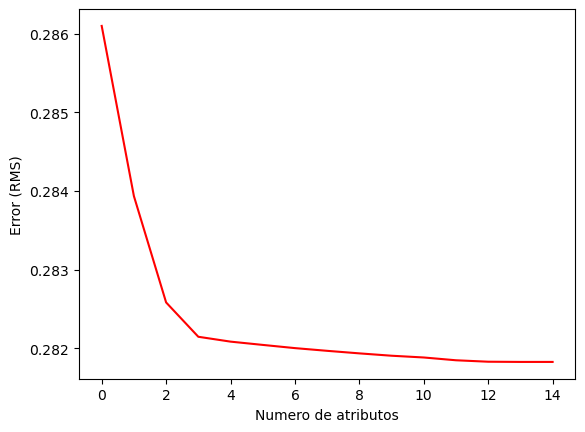

In [171]:
plt.plot(range(len(features)), feature_error, 'r-', label = 'Datos')

plt.xlabel('Numero de atributos')
plt.ylabel('Error (RMS)')
plt.show()

#### Según los resultados del método Step Wise, al elegir las 15 variables independientes disminuye el Error RMS, por lo que se elegirán las 15 variables para nuestros modelos de entrenamiento.

## Entrenamiento del Modelo

## 1. Modelos de Clasificación

#### Entrenaremos el modelo usando las 15 variables seleccionadas por el método de step Wise y lo dividiremos en grupos de train (25%) y test (75%)

In [172]:
X = df_x
y = df_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 1.1  Modelo K-Neighbors

In [173]:
# Se aplica SMOTE Tomek para abordar el desbalanceo de clases
smk = SMOTETomek(random_state=42)
X_train, y_train = smk.fit_resample(X_train, y_train)


neigh = KNeighborsClassifier()

parametros = {
    'n_neighbors': [1, 3, 5, 7]      
}

# Usando GridSearchCV con scoring='roc_auc'
grid_search = GridSearchCV(estimator=neigh, param_grid=parametros, scoring='roc_auc', cv=5)

grid_search.fit(X_train, y_train)

mejor_modelo = grid_search.best_estimator_

# Realizando las predicciones en el conjunto de entrenamiento y prueba con el mejor modelo
y_train_pred = mejor_modelo.predict(X_train)
y_test_pred = mejor_modelo.predict(X_test)

# Obteniendo los indicadores del modelo:
accuracy_knn = accuracy_score(y_test, y_test_pred)
recall_knn = recall_score(y_test, y_test_pred)
roc_knn = roc_auc_score(y_test, y_test_pred)
print("Accuracy para el conjunto de prueba KNN:", accuracy_knn)
print("Recall para el conjunto de prueba KNN:", recall_knn)
print("ROC-AUC para el conjunto de prueba KNN:", roc_knn)


Accuracy para el conjunto de prueba KNN: 0.8139006170834686
Recall para el conjunto de prueba KNN: 0.8201754385964912
ROC-AUC para el conjunto de prueba KNN: 0.8164925992067473


- Con el modelo KNN obtenemos (0.81 y 0.82)  en los indicadores de Accuracy y Recall respectivamente.
- La metrica **ROC del modelo KNN indica un 0.816 de presición.**
- Compararemos estos resultados con los que obtengamos al entrenar otros modelos que se pueden adaptar a nuetro dataset.

### 1.2 Modelo Random Forest

Para el modelo de Random Forest usaremos todas las variables independientes, y usaremos el 25% de los datos para entrenamiento y el 75% para las pruebas

In [176]:
modelo_rf = RandomForestClassifier(random_state=42)

parametros = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurando la métrica a utilizar (en este caso, ROC-AUC).
metrica_a_optimizar = 'roc_auc'

# Configurando la validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inicializando el objeto GridSearchCV
grid_search = GridSearchCV(estimator=modelo_rf, param_grid=parametros, scoring=metrica_a_optimizar, cv=cv)

# Entrenando el modelo con GridSearchCV
grid_search.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

Obtenemos el mejor modelo usando después de usar CrossValidation y Realizamos las predicciones en los conjuntos de datos de entrenamiento y pruebas y obtenemos los indicadores de presición del modelo (accuracy, recall y ROC)

In [177]:
modelo_optimizado = grid_search.best_estimator_

# Obteniendo predicciones de entrenamiento y prueba con el mejor modelo.
y_train_pred = modelo_optimizado.predict(X_train)
y_test_pred = modelo_optimizado.predict(X_test)

# Métricas del modelo optimizado
accuracy_random_forest = accuracy_score(y_test, y_test_pred)
recall_random_forest = recall_score(y_test, y_test_pred)
roc_random_forest = roc_auc_score(y_test, y_test_pred)

print("Accuracy para el conjunto de prueba Random Forest:", accuracy_random_forest)
print("Recall para el conjunto de prueba Random Forest:", recall_random_forest)
print("ROC-AUC para el conjunto de prueba Random Forest:", roc_random_forest)

Accuracy para el conjunto de prueba Random Forest: 0.8635920753491393
Recall para el conjunto de prueba Random Forest: 0.7763157894736842
ROC-AUC para el conjunto de prueba Random Forest: 0.8275402813170937


- Con el modelo Random Forest obtenemos (0.86 y 0.77)  en los indicadores de Accuracy y Recall respectivamente.
- La metrica **ROC del modelo RANDOM FOREST indica un 0.82 de presición.**
- Hasta el momento, el modelo Random Forest tiene una mejor performance que KNN.

### 1.3 Modelo XG-Boost

In [178]:
modelo_xgboost = xgb.XGBClassifier(random_state=42)

parametros = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

#  Configurando la métrica a utilizar (en este caso, ROC-AUC).
metrica_a_optimizar = 'roc_auc'

# Configurando la validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iniciando GridSearchCV para XGBoost
grid_search = GridSearchCV(estimator=modelo_xgboost, param_grid=parametros, scoring=metrica_a_optimizar, cv=cv)

# Entrenamiento del modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Mejor modelo
modelo_optimizado = grid_search.best_estimator_

# predicciones de entrenamiento y prueba con el mejor modelo
y_train_pred = modelo_optimizado.predict(X_train)
y_test_pred = modelo_optimizado.predict(X_test)

# Métricas del modelo optimizado
accuracy_xgboost = accuracy_score(y_test, y_test_pred)
recall_xgboost = recall_score(y_test, y_test_pred)
roc_xgboost = roc_auc_score(y_test, y_test_pred)

print("Accuracy para el conjunto de prueba XGBoost:", accuracy_xgboost)
print("Recall para el conjunto de prueba XGBoost:", recall_xgboost)
print("ROC-AUC para el conjunto de prueba XGBoost:", roc_xgboost)


Accuracy para el conjunto de prueba XGBoost: 0.8619681714842481
Recall para el conjunto de prueba XGBoost: 0.7368421052631579
ROC-AUC para el conjunto de prueba XGBoost: 0.8102815177478581


- Con el modelo Random Forest obtenemos (0.86 y 0.73)  en los indicadores de Accuracy y Recall respectivamente.
- La metrica **ROC del modelo XG-BOOST indica un 0.81 de presición.**
- **Randon Forest sigue siendo el modelo con mejores indicadores de los 3**.


## 2. Modelo Lineal  de Regresión Logística

In [179]:
modelo_logistico = LogisticRegression(random_state=42)

parametros = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Parámetro de regularización
}

# validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV para la regresión logística
grid_search = GridSearchCV(estimator=modelo_logistico, param_grid=parametros, scoring='roc_auc', cv=cv)


grid_search.fit(X_train, y_train)

# Mejor modelo
modelo_optimizado = grid_search.best_estimator_

# Predicciones de entrenamiento y prueba con el mejor modelo
y_train_pred = modelo_optimizado.predict(X_train)
y_test_pred = modelo_optimizado.predict(X_test)

# Métricas del modelo optimizado
accuracy_logistico = accuracy_score(y_test, y_test_pred)
recall_logistico = recall_score(y_test, y_test_pred)
roc_logistico = roc_auc_score(y_test, y_test_pred)

print("Accuracy para el conjunto de prueba Regresión Logística:", accuracy_logistico)
print("Recall para el conjunto de prueba Regresión Logística:", recall_logistico)
print("ROC-AUC para el conjunto de prueba Regresión Logística:", roc_logistico)


Accuracy para el conjunto de prueba Regresión Logística: 0.8684637869438129
Recall para el conjunto de prueba Regresión Logística: 0.8070175438596491
ROC-AUC para el conjunto de prueba Regresión Logística: 0.8430817799359244


- El modelo de regresión logística obtiene indicadores  de (0.86 y 0.80) para Acuracy y Recall respectivamente
- El indicador **ROC del modelo logístico de 0.84** Es superior al ROC de 0.82 de Randon Forest por lo que **El modelo Logístico es el modelo con mejores indicadores hasta el momento**

## 3. Modelo de Redes Neuronales

In [180]:
modelo_neural = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compilando el modelo con la métrica ROC-AUC
modelo_neural.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

modelo_neural.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluando el modelo en el conjunto de prueba
y_test_pred_prueba = modelo_neural.predict(X_test)
y_test_pred = (y_test_pred_prueba > 0.5).astype(int)

# Métricas del modelo
accuracy_neural = accuracy_score(y_test, y_test_pred)
recall_neural = recall_score(y_test, y_test_pred)
roc_neural = roc_auc_score(y_test, y_test_pred_prueba)

print("Accuracy para el conjunto de prueba Red Neuronal:", accuracy_neural)
print("Recall para el conjunto de prueba Red Neuronal:", recall_neural)
print("ROC-AUC para el conjunto de prueba Red Neuronal:", roc_neural)

Epoch 1/10
432/432 [==============================] - 2s 3ms/step - loss: 0.3971 - auc_16: 0.8995 - val_loss: 0.4270 - val_auc_16: 0.0000e+00
Epoch 2/10
432/432 [==============================] - 1s 3ms/step - loss: 0.3422 - auc_16: 0.9249 - val_loss: 0.3993 - val_auc_16: 0.0000e+00
Epoch 3/10
432/432 [==============================] - 1s 3ms/step - loss: 0.3361 - auc_16: 0.9266 - val_loss: 0.3435 - val_auc_16: 0.0000e+00
Epoch 4/10
432/432 [==============================] - 1s 3ms/step - loss: 0.3334 - auc_16: 0.9273 - val_loss: 0.5075 - val_auc_16: 0.0000e+00
Epoch 5/10
432/432 [==============================] - 1s 3ms/step - loss: 0.3282 - auc_16: 0.9300 - val_loss: 0.3627 - val_auc_16: 0.0000e+00
Epoch 6/10
432/432 [==============================] - 2s 4ms/step - loss: 0.3258 - auc_16: 0.9309 - val_loss: 0.4043 - val_auc_16: 0.0000e+00
Epoch 7/10
432/432 [==============================] - 1s 3ms/step - loss: 0.3234 - auc_16: 0.9315 - val_loss: 0.4454 - val_auc_16: 0.0000e+00
Epoch 

 - El modelo de entrenamiento con Redes Neuronales RELU obtiene indicadores  de (0.86 y 0.80) para Acuracy y Recall respectivamente
 
- El indicador **ROC del modelo con REDES NEURONALES de 0.91** 

### El modelo de entrenamiento con REDES NEURONALES es que tiene mejores indicadores superando al modelo de regresión Logística  y a los demás modelos.

###  Matriz de Confusión del modelo con mejor indicador ROC (MODELO DE REDES NEURONALES)

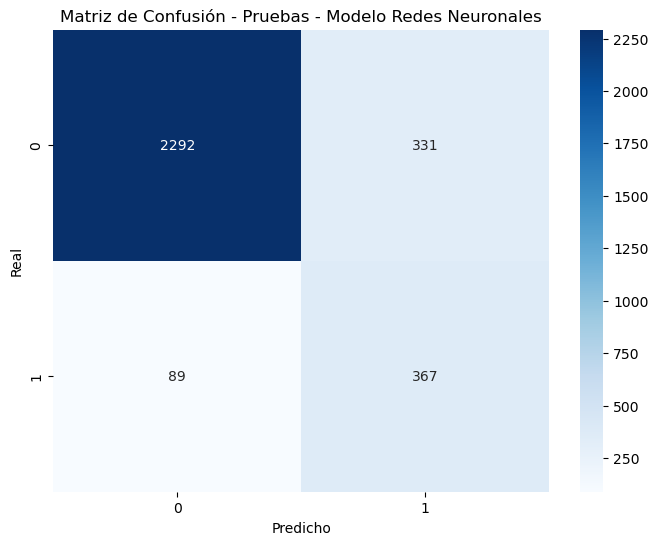

In [181]:
# Matriz de confusión para prueba
conf_matrix_test_redes_neuronales = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test_redes_neuronales, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Matriz de Confusión - Pruebas - Modelo Redes Neuronales')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

- Se puede observar que el modelo ha obtenido un total de 89  falsos negativos (FN) y 331 falsos positivos (FP) y ha acertado con 2292 predicciones negativas verdaderas (TN) y 367 positivas verdaderas (TP). estos valores nos serviran para obtener la rentabilidad total del modelo.
- El modelo ha acertado en un 96.2 % al predecir valores negativos verdaderos, con un 3.8% de falsos negativos.
- En cuanto a la prdicción de los resultados positivos el modelo ha acertado un 52.5% de positivos verdaderos con un error de 47.5% de falsos positivos.

### Podemos concluir que el modelo predice mejor los resultados negativos que los positivos.

## RENTABILIDAD DEL MODELO

Tomando en cuenta estos parámetros y los valores obtenidos en la matriz de confusión del modelo de Redes Neuronales se realizará el cálculo de la Rentabilidad del modelo

- Por cada TP obtenemos 100 €
- Por cada TN obtenemos 100€
- Por cada FP perdemos 20 € 
- Por cada FN perdemos 500 €


In [182]:
# Extraemos los valores de la matriz de confusión del modelo de Redes Neuronales
TP, FP, FN, TN = conf_matrix_test_redes_neuronales.ravel()

# Ganancias y pérdidas del modelo
ganancia_TP = 100  # Ganancia por Verdadero Positivo
ganancia_TN = 100  # Ganancia por Verdadero Negativo
perdida_FP = -20   # Pérdida por Falso Positivo
perdida_FN = -500  # Pérdida por Falso Negativo

# Cálculo de la rentabilidad total
rentabilidad_modelo = (TP * ganancia_TP) + (TN * ganancia_TN) + (FP * perdida_FP) + (FN * perdida_FN)


print("Rentabilidad Total del Modelo:", rentabilidad_modelo)


Rentabilidad Total del Modelo: 214780


## La rentabilidad final de nuestro modelo es  214,780 Euros.